In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import vector  ## added by mds
import awkward as ak
from scipy.signal import find_peaks

import iminuit
from iminuit import Minuit
from fit_classes import *
from utils import *

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Use LHCb style for plots
#import mplhep as hep
#plt.style.use(hep.style.CMS)
#plt.rcParams["figure.figsize"] = (8,6)
#plt.rcParams['font.family'] = 'DejaVu Sans' # Change 'DejaVu Sans' to a font installed on your system


In [4]:
rd_data = load_rd_data(base_path='/share/lazy/Bu2LambdaPHH/NTuples/RD/', decay_type ='B2L0pbarKpKm')


In [5]:


selected_mc_types = ['MCB2L0barPKpKm']
mc_data = load_mc_data(base_path='/share/lazy/Bu2LambdaPHH/NTuples/MC', selected_mc_types=selected_mc_types, decay_tree='B2L0barpKpKm')

In [6]:
print(f"selected mc types: {mc_data}")

selected mc types: ['/share/lazy/Bu2LambdaPHH/NTuples/MC/MCB2L0barPKpKm_15MU.root:B2L0barpKpKm/DecayTree', '/share/lazy/Bu2LambdaPHH/NTuples/MC/MCB2L0barPKpKm_16MU.root:B2L0barpKpKm/DecayTree', '/share/lazy/Bu2LambdaPHH/NTuples/MC/MCB2L0barPKpKm_17MU.root:B2L0barpKpKm/DecayTree', '/share/lazy/Bu2LambdaPHH/NTuples/MC/MCB2L0barPKpKm_18MU.root:B2L0barpKpKm/DecayTree', '/share/lazy/Bu2LambdaPHH/NTuples/MC/MCB2L0barPKpKm_15MD.root:B2L0barpKpKm/DecayTree', '/share/lazy/Bu2LambdaPHH/NTuples/MC/MCB2L0barPKpKm_16MD.root:B2L0barpKpKm/DecayTree', '/share/lazy/Bu2LambdaPHH/NTuples/MC/MCB2L0barPKpKm_17MD.root:B2L0barpKpKm/DecayTree', '/share/lazy/Bu2LambdaPHH/NTuples/MC/MCB2L0barPKpKm_18MD.root:B2L0barpKpKm/DecayTree']


Run the following regardless of data choice

In [7]:
arrs_rd = uproot.concatenate(rd_data)
print("Concantenated arrays are ready:")
print(f"Number of events: {len(arrs_rd)}")
#print(f"Number of variables: {len(arrs_rd[0])}")


Concantenated arrays are ready:
Number of events: 26584


In [8]:
arrs_mc = uproot.concatenate(mc_data)
print("MC Concantenated arrays are ready:")
print(f"MC Number of events: {len(arrs_mc)}")


MC Concantenated arrays are ready:
MC Number of events: 36339


In [9]:
# Define variables for real data
h1_P = arrs_rd['h1_P']
h1_PT = arrs_rd['h1_PT']
h1_PE = arrs_rd['h1_PE']
h1_PX = arrs_rd['h1_PX']
h1_PY = arrs_rd['h1_PY']
h1_PZ = arrs_rd['h1_PZ']
h1_ID = arrs_rd['h1_ID']
h1_TRACK_Type = arrs_rd['h1_TRACK_Type']
h2_P = arrs_rd['h2_P']
h2_PT = arrs_rd['h2_PT']
h2_PE = arrs_rd['h2_PE']
h2_PX = arrs_rd['h2_PX']
h2_PY = arrs_rd['h2_PY']
h2_PZ = arrs_rd['h2_PZ']
h2_ID = arrs_rd['h2_ID']
h2_TRACK_Type = arrs_rd['h2_TRACK_Type']
p_P = arrs_rd['p_P']
p_PT = arrs_rd['p_PT']
p_PE = arrs_rd['p_PE']
p_PX = arrs_rd['p_PX']
p_PY = arrs_rd['p_PY']
p_PZ = arrs_rd['p_PZ']
p_ID = arrs_rd['p_ID']
p_TRACK_Type = arrs_rd['p_TRACK_Type']
Lp_P = arrs_rd['Lp_P']
Lp_PT = arrs_rd['Lp_PT']
Lp_PE = arrs_rd['Lp_PE']
Lp_PX = arrs_rd['Lp_PX']
Lp_PY = arrs_rd['Lp_PY']
Lp_PZ = arrs_rd['Lp_PZ']
Lp_ID = arrs_rd['Lp_ID']
Lp_TRACK_Type = arrs_rd['Lp_TRACK_Type']
Lp_ProbNNp = arrs_rd['Lp_ProbNNp']
LL = (3 == Lp_TRACK_Type)
DD = (5 == Lp_TRACK_Type)
Lpi_P = arrs_rd['Lpi_P']
Lpi_PT = arrs_rd['Lpi_PT']
Lpi_PE = arrs_rd['Lpi_PE']
Lpi_PX = arrs_rd['Lpi_PX']
Lpi_PY = arrs_rd['Lpi_PY']
Lpi_PZ = arrs_rd['Lpi_PZ']
Lpi_ID = arrs_rd['Lpi_ID']
Lpi_TRACK_Type = arrs_rd['Lpi_TRACK_Type']
Lpi_ProbNNpi = arrs_rd['Lpi_ProbNNpi']
L0_P = arrs_rd['L0_P']
L0_PT = arrs_rd['L0_PT']
L0_PE = arrs_rd['L0_PE']
L0_PX = arrs_rd['L0_PX']
L0_PY = arrs_rd['L0_PY']
L0_PZ = arrs_rd['L0_PZ']
L0_ID = arrs_rd['L0_ID']
L0_MM = arrs_rd['L0_MM']
L0_DOCA12 = arrs_rd['L0_DOCA12']

# Define variables for Monte Carlo data
h1_P_mc = arrs_mc['h1_P']
h1_PT_mc = arrs_mc['h1_PT']
h1_PE_mc = arrs_mc['h1_PE']
h1_PX_mc = arrs_mc['h1_PX']
h1_PY_mc = arrs_mc['h1_PY']
h1_PZ_mc = arrs_mc['h1_PZ']
h1_ID_mc = arrs_mc['h1_ID']
h1_TRACK_Type_mc = arrs_mc['h1_TRACK_Type']
h2_P_mc = arrs_mc['h2_P']
h2_PT_mc = arrs_mc['h2_PT']
h2_PE_mc = arrs_mc['h2_PE']
h2_PX_mc = arrs_mc['h2_PX']
h2_PY_mc = arrs_mc['h2_PY']
h2_PZ_mc = arrs_mc['h2_PZ']
h2_ID_mc = arrs_mc['h2_ID']
h2_TRACK_Type_mc = arrs_mc['h2_TRACK_Type']
p_P_mc = arrs_mc['p_P']
p_PT_mc = arrs_mc['p_PT']
p_PE_mc = arrs_mc['p_PE']
p_PX_mc = arrs_mc['p_PX']
p_PY_mc = arrs_mc['p_PY']
p_PZ_mc = arrs_mc['p_PZ']
p_ID_mc = arrs_mc['p_ID']
p_TRACK_Type_mc = arrs_mc['p_TRACK_Type']
Lp_P_mc = arrs_mc['Lp_P']
Lp_PT_mc = arrs_mc['Lp_PT']
Lp_PE_mc = arrs_mc['Lp_PE']
Lp_PX_mc = arrs_mc['Lp_PX']
Lp_PY_mc = arrs_mc['Lp_PY']
Lp_PZ_mc = arrs_mc['Lp_PZ']
Lp_ID_mc = arrs_mc['Lp_ID']
Lp_TRACK_Type_mc = arrs_mc['Lp_TRACK_Type']
Lp_ProbNNp_mc = arrs_mc['Lp_ProbNNp']
LL_mc = (3 == Lp_TRACK_Type_mc)
DD_mc = (5 == Lp_TRACK_Type_mc)
Lpi_P_mc = arrs_mc['Lpi_P']
Lpi_PT_mc = arrs_mc['Lpi_PT']
Lpi_PE_mc = arrs_mc['Lpi_PE']
Lpi_PX_mc = arrs_mc['Lpi_PX']
Lpi_PY_mc = arrs_mc['Lpi_PY']
Lpi_PZ_mc = arrs_mc['Lpi_PZ']
Lpi_ID_mc = arrs_mc['Lpi_ID']
Lpi_TRACK_Type_mc = arrs_mc['Lpi_TRACK_Type']
Lpi_ProbNNpi_mc = arrs_mc['Lpi_ProbNNpi']
L0_P_mc = arrs_mc['L0_P']
L0_PT_mc = arrs_mc['L0_PT']
L0_PE_mc = arrs_mc['L0_PE']
L0_PX_mc = arrs_mc['L0_PX']
L0_PY_mc = arrs_mc['L0_PY']
L0_PZ_mc = arrs_mc['L0_PZ']
L0_ID_mc = arrs_mc['L0_ID']
L0_MM_mc = arrs_mc['L0_MM']
L0_DOCA12_mc = arrs_mc['L0_DOCA12']

In [10]:
print('Lp_ID = ',Lp_ID)
if np.any(np.bitwise_or(Lp_ID == 2212, Lp_ID == -2212)):
    print('Lp is pi-/+ particles (that should come from Lambda)')
else:
    print('Lp is not pi-/+ particles (that should come from Lambda)')    
print('p_ID = ', p_ID)
if np.any(np.bitwise_or(p_ID == 2212, p_ID == -2212)):
    print('p is p-/+ particles')
else:
    print('p is not p-/+ particles. probably something went wrong')    
print('h1_ID =', h1_ID)
if np.any(np.bitwise_or(h1_ID == 211, h1_ID == -211)):
    print('h1 is pi-/+ particles')
elif np.any(np.bitwise_or(h1_ID == 321, h1_ID == -321)):
    print('h1 is K-/+ particles')
elif np.any(np.bitwise_or(h1_ID == 2212, h1_ID == -2212)):
    print('h1 is p-/+ particles')    
print('h2_ID =', h2_ID)
if np.any(np.bitwise_or(h2_ID == 211, h2_ID == -211)):
    print('h2 is pi-/+ particles')
elif np.any(np.bitwise_or(h2_ID == 321, h2_ID == -321)):
    print('h2 is K-/+ particles')
elif np.any(np.bitwise_or(h2_ID == 2212, h2_ID == -2212)):
    print('h2 is p-/+ particles')        
print('Lpi_ID =', Lpi_ID)
if np.any(np.bitwise_or(Lpi_ID == 211, Lpi_ID == -211)):
    print('Lpi is pi-/+ particles (that should come from Lambda)')
else:
    print('Lpi is not pi-/+ particles (that should come from Lambda)')    
print('L0_ID =', L0_ID)
if np.any(np.bitwise_or(L0_ID == 3122, L0_ID == -3122)):
    print('L0 is Lambda particles')
else:
    print('L0 is not Lambda particles. probably something went wrong')    


Lp_ID =  [-2212, 2212, 2212, 2212, -2212, -2212, ..., -2212, 2212, -2212, 2212, -2212]
Lp is pi-/+ particles (that should come from Lambda)
p_ID =  [2212, -2212, -2212, -2212, 2212, 2212, ..., 2212, -2212, 2212, -2212, 2212]
p is p-/+ particles
h1_ID = [321, -321, -321, -321, 321, 321, -321, ..., -321, 321, -321, 321, -321, 321]
h1 is K-/+ particles
h2_ID = [-321, 321, 321, 321, -321, -321, 321, ..., 321, -321, 321, -321, 321, -321]
h2 is K-/+ particles
Lpi_ID = [211, -211, -211, -211, 211, 211, -211, ..., -211, 211, -211, 211, -211, 211]
Lpi is pi-/+ particles (that should come from Lambda)
L0_ID = [-3122, 3122, 3122, 3122, -3122, -3122, ..., -3122, 3122, -3122, 3122, -3122]
L0 is Lambda particles


In [11]:
Bu_FDCHI2_OWNPV = arrs_rd['Bu_FDCHI2_OWNPV']
L0_ENDVERTEX_X = arrs_rd['L0_ENDVERTEX_X'] # The x coordinate of the L0 decay vertex
L0_ENDVERTEX_Y = arrs_rd['L0_ENDVERTEX_Y'] # The y coordinate of the L0 decay vertex
L0_ENDVERTEX_Z = arrs_rd['L0_ENDVERTEX_Z'] # The z coordinate of the L0 decay vertex
L0_ENDVERTEX_XERR = arrs_rd['L0_ENDVERTEX_XERR'] # The error on the x coordinate of the L0 decay vertex
L0_ENDVERTEX_YERR = arrs_rd['L0_ENDVERTEX_YERR'] # The error on the y coordinate of the L0 decay vertex
L0_ENDVERTEX_ZERR = arrs_rd['L0_ENDVERTEX_ZERR'] # The error on the z coordinate of the L0 decay vertex
L0_OWNPV_Z = arrs_rd['L0_OWNPV_Z'] # The z coordinate of the L0 production vertex
L0_OWNPV_ZERR = arrs_rd['L0_OWNPV_ZERR'] # The error on the z coordinate of the L0 production vertex

L0_FD_OWNPV = arrs_rd['L0_FD_OWNPV'] # The flight distance of the L0 decay vertex from the L0 production vertex
L0_FDCHI2_OWNPV = arrs_rd['L0_FDCHI2_OWNPV'] # The flight distance of the L0 decay vertex from the L0 production vertex, normalised by its uncertainty
Bu_ENDVERTEX_X = arrs_rd['Bu_ENDVERTEX_X'] # The x coordinate of the Bu decay vertex
Bu_ENDVERTEX_Y = arrs_rd['Bu_ENDVERTEX_Y'] # The y coordinate of the Bu decay vertex
Bu_ENDVERTEX_Z = arrs_rd['Bu_ENDVERTEX_Z'] # The z coordinate of the Bu decay vertex
Bu_ENDVERTEX_XERR = arrs_rd['Bu_ENDVERTEX_XERR'] # The error on the x coordinate of the Bu decay vertex
Bu_ENDVERTEX_YERR = arrs_rd['Bu_ENDVERTEX_YERR'] # The error on the y coordinate of the Bu decay vertex
Bu_ENDVERTEX_ZERR = arrs_rd['Bu_ENDVERTEX_ZERR'] # The error on the z coordinate of the Bu decay vertex
Bu_IPCHI2_OWNPV = arrs_rd['Bu_IPCHI2_OWNPV'] # The chi-square of the impact parameter (the distance of closest approach of the particle track to the primary vertex)
Bu_MM = arrs_rd['Bu_MM'] # The invariant mass of the Bu candidate

Bu_DOCA12 = arrs_rd['Bu_DOCA12'] # The distance of closest approach between the two daughters of the Bu candidate
Delta_Z = L0_ENDVERTEX_Z - Bu_ENDVERTEX_Z # The difference in z coordinates between the L0 and Bu decay vertices
Delta_X = L0_ENDVERTEX_X - Bu_ENDVERTEX_X # The difference in x coordinates between the L0 and Bu decay vertices
Delta_Y = L0_ENDVERTEX_Y - Bu_ENDVERTEX_Y # The difference in y coordinates between the L0 and Bu decay vertices
Delta_X_ERR = np.sqrt(np.square(Bu_ENDVERTEX_XERR)+np.square(L0_ENDVERTEX_XERR)) # The error on the difference in x coordinates between the L0 and Bu decay vertices
Delta_Y_ERR = np.sqrt(np.square(Bu_ENDVERTEX_YERR)+np.square(L0_ENDVERTEX_YERR)) # The error on the difference in y coordinates between the L0 and Bu decay vertices
Delta_Z_ERR = np.sqrt(np.square(Bu_ENDVERTEX_ZERR)+np.square(L0_ENDVERTEX_ZERR)) # The error on the difference in z coordinates between the L0 and Bu decay vertices
Delta_X_ERR_sq = np.square(Delta_X_ERR)
Delta_Y_ERR_sq = np.square(Delta_Y_ERR)
Delta_Z_ERR_sq = np.square(Delta_Z_ERR)

delta_x = np.divide(Delta_X,Delta_X_ERR) # The difference in x coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
delta_y = np.divide(Delta_Y,Delta_Y_ERR) # The difference in y coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
delta_z = np.divide(Delta_Z,Delta_Z_ERR) # The difference in z coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
L0_FD_CHISQ = np.square(delta_x) + np.square(delta_y) + np.square(delta_z) # The flight distance of the L0 decay vertex from the L0 production vertex, normalised by its uncertainty



Bu_FDCHI2_OWNPV_mc = arrs_mc['Bu_FDCHI2_OWNPV']
L0_ENDVERTEX_X_mc = arrs_mc['L0_ENDVERTEX_X']
L0_ENDVERTEX_Y_mc = arrs_mc['L0_ENDVERTEX_Y']
L0_ENDVERTEX_Z_mc = arrs_mc['L0_ENDVERTEX_Z']
L0_ENDVERTEX_XERR_mc = arrs_mc['L0_ENDVERTEX_XERR']
L0_ENDVERTEX_YERR_mc = arrs_mc['L0_ENDVERTEX_YERR']
L0_ENDVERTEX_ZERR_mc = arrs_mc['L0_ENDVERTEX_ZERR']
L0_OWNPV_Z_mc = arrs_mc['L0_OWNPV_Z']
L0_OWNPV_ZERR_mc = arrs_mc['L0_OWNPV_ZERR']
L0_FD_OWNPV_mc = arrs_mc['L0_FD_OWNPV']
L0_FDCHI2_OWNPV_mc = arrs_mc['L0_FDCHI2_OWNPV']
Bu_ENDVERTEX_X_mc = arrs_mc['Bu_ENDVERTEX_X']
Bu_ENDVERTEX_Y_mc = arrs_mc['Bu_ENDVERTEX_Y']
Bu_ENDVERTEX_Z_mc = arrs_mc['Bu_ENDVERTEX_Z']
Bu_ENDVERTEX_XERR_mc = arrs_mc['Bu_ENDVERTEX_XERR']
Bu_ENDVERTEX_YERR_mc = arrs_mc['Bu_ENDVERTEX_YERR']
Bu_ENDVERTEX_ZERR_mc = arrs_mc['Bu_ENDVERTEX_ZERR']
Bu_IPCHI2_OWNPV_mc = arrs_mc['Bu_IPCHI2_OWNPV']
Bu_MM_mc = arrs_mc['Bu_MM']
Bu_DOCA12_mc = arrs_mc['Bu_DOCA12']

Delta_Z_mc = L0_ENDVERTEX_Z_mc - Bu_ENDVERTEX_Z_mc
Delta_X_mc = L0_ENDVERTEX_X_mc - Bu_ENDVERTEX_X_mc
Delta_Y_mc = L0_ENDVERTEX_Y_mc - Bu_ENDVERTEX_Y_mc
Delta_X_ERR_mc = np.sqrt(np.square(Bu_ENDVERTEX_XERR_mc)+np.square(L0_ENDVERTEX_XERR_mc))
Delta_Y_ERR_mc = np.sqrt(np.square(Bu_ENDVERTEX_YERR_mc)+np.square(L0_ENDVERTEX_YERR_mc))
Delta_Z_ERR_mc = np.sqrt(np.square(Bu_ENDVERTEX_ZERR_mc)+np.square(L0_ENDVERTEX_ZERR_mc))
Delta_X_ERR_sq_mc = np.square(Delta_X_ERR_mc)
Delta_Y_ERR_sq_mc = np.square(Delta_Y_ERR_mc)
Delta_Z_ERR_sq_mc = np.square(Delta_Z_ERR_mc)

delta_x_mc = np.divide(Delta_X_mc,Delta_X_ERR_mc)
delta_y_mc = np.divide(Delta_Y_mc,Delta_Y_ERR_mc)
delta_z_mc = np.divide(Delta_Z_mc,Delta_Z_ERR_mc)
L0_FD_CHISQ_mc = np.square(delta_x_mc) + np.square(delta_y_mc) + np.square(delta_z_mc)


In [12]:
h1_probNNk = arrs_rd['h1_MC15TuneV1_ProbNNk']
h2_probNNk = arrs_rd['h2_MC15TuneV1_ProbNNk']
p_ProbNNp  = arrs_rd['p_MC15TuneV1_ProbNNp']


# Lambda Fitting

In this section, we will try fitting different cuts and fits for `L0`, `LO0_LL` and `L0_DD`.

First lets define some cuts that would be useful later

In [13]:


good_Delta_Z = Delta_Z>0.
good_Lambda_chisq_9 = L0_FD_CHISQ>9.
good_Lambda_sep_9 =  good_Delta_Z & good_Lambda_chisq_9
bad_Delta_Z = Delta_Z<0.
bad_Lambda_chisq_9  = L0_FD_CHISQ<9.
bad_Lambda_sep_9 =  bad_Delta_Z | bad_Lambda_chisq_9
good_Delta_Z = Delta_Z>0.
good_Lambda_chisq_100  = L0_FD_CHISQ>100.
good_Lambda_sep_100 =  good_Delta_Z & good_Lambda_chisq_100



ProbNNp_0p1_0p2 = (Lp_ProbNNp>0.1) & (Lp_ProbNNp<0.2)
prodProbKK = np.multiply(h1_probNNk,h2_probNNk)

B_region = (Bu_MM>5255.) & (Bu_MM<5305.)
prodProbNNx = np.multiply(p_ProbNNp,prodProbKK)

good_LambdaLL   = (Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & good_Delta_Z & good_Lambda_chisq_100 & LL
good_LambdaDD   = (Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & DD
good_Lambda     = good_LambdaLL | good_LambdaDD
good_prompt     = (Lp_ProbNNp>0.2) & (L0_FD_CHISQ<9) & LL
better_Lambda   = good_Lambda & (Bu_IPCHI2_OWNPV<6) 
better_LambdaLL = good_LambdaLL & (Bu_IPCHI2_OWNPV<6)
better_LambdaDD = good_LambdaDD & (Bu_IPCHI2_OWNPV<6)

temp_cut = good_Delta_Z & good_Lambda_chisq_100 & (Lp_ProbNNp>0.2)
temp_cutLL = temp_cut & LL
temp_cutDD = temp_cut & DD

### Lambda (Both LL & DD)

#### Fit using Double Gaussian and Exponential

The fit is for Lamdas with the following cuts 

- `good_LambdaLL`   = `(Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & good_Delta_Z & good_Lambda_chisq_100 & LL`
- `good_LambdaDD`   = `(Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & DD`
- `good_Lambda`     = `good_LambdaLL | good_LambdaDD`


In [14]:
# Use the class:
nCL, binsL, patches = plt.hist(L0_MM[good_Lambda], bins=60, range=(1100,1130))
plt.close()

# Set the initial parameter values and limits for the fit


# DoubleGaussian_plus_Exp [n_s, f, n_b, mu1, mu2, sigma1, sigma2, A, b] 
init_pars_L = [11005.732173135082, 1.1619222783767378, 6834.848216510317, 1115.4414513155293, 1113.7938766965826, 1.8129137987088082, 1.0255352513569524, -0.05233962139669712, -0.13964421074015215] ## good_Lambda


# DoubleGaussian_plus_linear [n_s, f, n_b, mu1, mu2, sigma1, sigma2, m, b]
#init_pars_B = [1000, 0.5, 300, 1113, 1115, 13.0, 15.0, 0.0001, 0.0001]

# DoubleGaussian_plust_parabola [n_s, f, n_b, mu1, mu2, sigma1, sigma2, a, b, c]
#init_pars = [2000., 0.5, 20000., 5280., 5285., 10., 15., 0.01, 0.001, 0.01]


# Gaussian_plus_Exp [n_s, n_b, mu, sigma, A, b]
#init_pars = [1000., 800., 20000., 5280., 5285., 10., 15., 0.04, 0.005]

# DoubleGaussian_plus_argus [n_s, f, n_b, mu1, mu2, sigma1, sigma2, m0, c, p]


minuit_limits_L = {
    "f": (0.0001, 0.9999),
}
fit_model_L = DoubleGaussian_plus_Exp(binsL, nCL, minuit_limits_L)

fit_result_L = fit_model_L.fit(init_pars_L)

# Print the fitted parameters
print("Fitted parameters:", fit_result_L.values)
fit_result_L

Fitted parameters: <ValueView n_s=11395.657334306532 f=0.7281470364367627 n_b=3699.572885788216 mu1=1115.8982642382796 mu2=1115.6974045626948 sigma1=2.114340890088845 sigma2=0.9990358281704765 A=-0.05233995494497088 b=-0.05933690227932038>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 16.47                      │              Nfcn = 949              │
│ EDM = 2.6e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s    │  11.4e3   │   0.9e3   │            │            │         │         │       │
│ 1 │ f      │   0.73    │   0.10    │            │            │ 0.0001  │ 0.9999  │       │
│ 2 │ n_b    │   3.7e3   │   2.1e3   │            │            │         │         │       │
│ 3 │ mu1    │ 1.11590e3 │ 0.00008e3 │            │            │         │         │       │
│ 4 │ mu2    │ 1.11570e3 │ 0.00006e3 │            │            │         │         │       │
│ 5 │ sigma1 │   2.11    │   0.30    │            │            │         │         │       │
│ 6 │ sigma2 │   1.00    │   0.15    │            │            │         │         │       │
│ 7 │ A      │    -0     │   0.3e3   │            │            │         │         │       │
│ 8 │ b      │   -0.06   │   0.05    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬──────────────────────────────────────────────────────────────────────────────────┐
│        │      n_s        f      n_b      mu1      mu2   sigma1   sigma2        A        b │
├────────┼──────────────────────────────────────────────────────────────────────────────────┤
│    n_s │ 7.74e+05  -72.534   -1.8e6   27.071  25.5116   249.57  100.748        0 -28.2548 │
│      f │  -72.534   0.0106  177.237   -0.005  -0.0024   -0.028   -0.015   -0.001   0.0017 │
│    n_b │   -1.8e6  177.237 4.35e+06  -85.149 -51.7168  -595.28 -245.856       -0  53.1081 │
│    mu1 │   27.071   -0.005  -85.149  0.00624  -0.0012    0.012    0.007    0.000   0.0014 │
│    mu2 │  25.5116  -0.0024 -51.7168  -0.0012  0.00352   0.0083   0.0034   0.0008  -0.0017 │
│ sigma1 │   249.57   -0.028  -595.28    0.012   0.0083   0.0873    0.039     0.01  -0.0078 │
│ sigma2 │  100.748   -0.015 -245.856    0.007   0.0034    0.039   0.0226    0.002  -0.0023 │
│      A │        0   -0.001       -0    0.000   0.0008     0.01    0.002 8.77e+04  -0.0011 │
│      b │ -28.2548   0.0017  53.1081   0.0014  -0.0017  -0.0078  -0.0023  -0.0011  0.00247 │
└────────┴──────────────────────────────────────────────────────────────────────────────────┘

We can actually try random search to get better inital guess

In [15]:
root_name = "_LL"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "param_ranges": None,
    "random_search": None,
    "best_score": None,
    "best_params": None,
    "best_fit": None,
    "best_fit_m": None,
    "parsed_output": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM[good_Lambda], bins=60, range=(1100,1130))
plt.close()

variables["param_ranges" + root_name] = {
    "n_s": (1000, 10000),
    "f": (0.001, 0.999),
    "n_b": (10, 100),
    "mu1": (1110, 1116),
    "mu2": (1110, 1116),
    "sigma1": (10, 20),
    "sigma2": (10, 20),
    "A": (-0.1, 0.1),
    "b": (-1, 1),
}

variables["random_search" + root_name] = RandomSearch(variables["bins" + root_name], variables["nC" + root_name], fit_class=DoubleGaussian_plus_Exp, search_ranges=variables["param_ranges" + root_name], num_searches=100)

# Perform the search
variables["best_score" + root_name], variables["best_params" + root_name], variables["best_fit" + root_name] = variables["random_search" + root_name].perform_search()

# Print the results
print("Best chi2:", variables["best_score" + root_name])
print("Best initial parameters:", variables["best_params" + root_name])

# Fit the best_fit with the best_params
best_params_list = [variables["best_params" + root_name][param] for param in ["n_s", "f", "n_b", "mu1", "mu2", "sigma1", "sigma2", "A", "b"]]
variables["best_fit_m" + root_name] = variables["best_fit" + root_name].fit(best_params_list)


# Print the fitted parameters in a nice format to copy-paste
variables["parsed_output" + root_name] = parse_best_fit_parameters(variables["best_fit_m" + root_name].values)
print(variables["parsed_output" + root_name])


Best chi2: 7485.678842409708
Best initial parameters: {'n_s': 9859.164478794495, 'f': 0.9801686619369498, 'n_b': 42.52881812633003, 'mu1': 1115.2046997472125, 'mu2': 1112.654570621669, 'sigma1': 11.760040541450833, 'sigma2': 14.239617309078902, 'A': 0.06721883439372539, 'b': -0.373595087271692}
10136.975116642596, 0.9715872297912379, 7670.297317449797, 1115.8046658695764, 1367.637689692068, 1.5696922202544359, 9.038126244467492, 0.0672185138693453, -0.035640062468950164>


Lets plot the histogram and fit superimposed on the hitsogram for lambda with same cuts but without the mass cut.

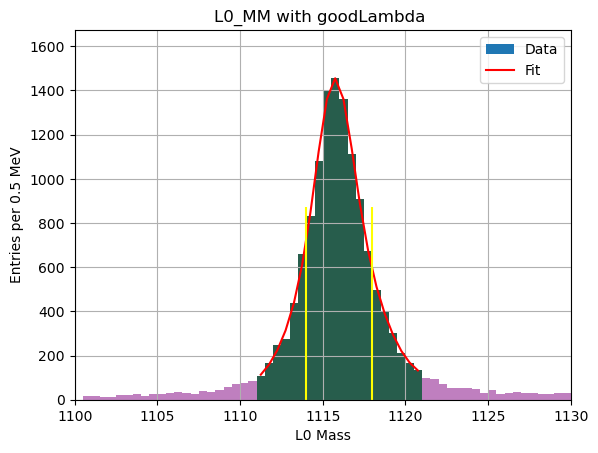

In [16]:
fig, ax = fit_model_L.plot(fit_result_L, binsL, nCL, title='L0_MM with goodLambda ', xlabel='L0 Mass', ylabel='Entries per 0.5 MeV', vlines=[1114., 1118.], show_plot=False)
ax.hist(L0_MM[temp_cut], bins=60, range=(1100, 1130), color='purple', alpha=0.5)
ax.hist(L0_MM[good_Lambda], bins=60, range=(1100, 1130), color='g', alpha=0.5)
plt.show()

### Lambda LL (L0_LL)

### Fit using Double Gaussian plus Explonential

Now lets do the random search / also use things in a better and (hacky) way. 

The fit is for L0 with the following cuts 

`good_LambdaLL`   = `(Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & good_Delta_Z & good_Lambda_chisq_100 & LL`


In [17]:
root_name = "_LL"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "param_ranges": None,
    "random_search": None,
    "best_score": None,
    "best_params": None,
    "best_fit": None,
    "best_fit_m": None,
    "parsed_output": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM[good_LambdaLL], bins=60, range=(1100,1130))
plt.close()

variables["param_ranges" + root_name] = {
    "n_s": (1000, 10000),
    "f": (0.001, 0.999),
    "n_b": (10, 100),
    "mu1": (1110, 1116),
    "mu2": (1110, 1116),
    "sigma1": (10, 20),
    "sigma2": (10, 20),
    "A": (-0.1, 0.1),
    "b": (-1, 1),
}

variables["random_search" + root_name] = RandomSearch(variables["bins" + root_name], variables["nC" + root_name], fit_class=DoubleGaussian_plus_Exp, search_ranges=variables["param_ranges" + root_name], num_searches=100)

# Perform the search
variables["best_score" + root_name], variables["best_params" + root_name], variables["best_fit" + root_name] = variables["random_search" + root_name].perform_search()

# Print the results
print("Best chi2:", variables["best_score" + root_name])
print("Best initial parameters:", variables["best_params" + root_name])

# Fit the best_fit with the best_params
best_params_list = [variables["best_params" + root_name][param] for param in ["n_s", "f", "n_b", "mu1", "mu2", "sigma1", "sigma2", "A", "b"]]
variables["best_fit_m" + root_name] = variables["best_fit" + root_name].fit(best_params_list)


# Print the fitted parameters in a nice format to copy-paste
variables["parsed_output" + root_name] = parse_best_fit_parameters(variables["best_fit_m" + root_name].values)
print(variables["parsed_output" + root_name])


Best chi2: 1196.044480175761
Best initial parameters: {'n_s': 2129.3780397440482, 'f': 0.09709145972092276, 'n_b': 66.72570644729507, 'mu1': 1110.7340809528928, 'mu2': 1114.3210289526592, 'sigma1': 15.740890858131587, 'sigma2': 11.86155861132105, 'A': 0.03235662495267083, 'b': 0.963739374761712}
1417.326091154413, -0.07384020785426768, 857.2842756262299, 1004.6311925830764, 1115.873995396019, 3.6561975912622175, 1.2286650629564757, 0.03235644361404597, 0.029366446908942623>


We can use these values as a good initial guess list 

In [18]:
root_name = "_LL"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "init_pars": None,
    "minuit_limits": None,
    "fit_model": None,
    "fit_result": None,
    "fig": None,
    "ax": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM[good_LambdaLL], bins=60, range=(1100,1130))
plt.close()

# DoubleGaussian_plus_Exp [n_s, f, n_b, mu1, mu2, sigma1, sigma2, A, b] 
variables["init_pars" + root_name] = [4880.323151437834, 0.30218114866044526, -12430.721799374644, 1115.8681948495157, 1108.8391127041216, -1.2022289953238405, 39.884197587964735, 0.02633483502624763, -0.6946758682231935]
variables["minuit_limits" + root_name] = {
    "f": (0.0001, 0.9999),
}

variables["fit_model" + root_name] = DoubleGaussian_plus_Exp(variables["bins" + root_name], variables["nC" + root_name], variables["minuit_limits" + root_name])

variables["fit_result" + root_name] = variables["fit_model" + root_name].fit(variables["init_pars" + root_name])

# Print the fitted parameters
print("Fitted parameters:", variables["fit_result" + root_name].values)
variables["fit_result" + root_name]



Fitted parameters: <ValueView n_s=5045.549008950746 f=0.24784737346869992 n_b=-5487.4507673910575 mu1=1115.8190047660553 mu2=1119.1867970801372 sigma1=-1.0597049349811507 sigma2=6.176431065384252 A=0.026334835026343924 b=-0.10761021228650822>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 13.35                      │             Nfcn = 1518              │
│ EDM = 3.21e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           ABOVE call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│           Hesse FAILED           │           ABOVE call limit           │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s    │ 5.0455e3  │ 0.0000e3  │            │            │         │         │       │
│ 1 │ f      │ 2.4785e-1 │ 0.0000e-1 │            │            │ 0.0001  │ 0.9999  │       │
│ 2 │ n_b    │ -5.4875e3 │ 0.0000e3  │            │            │         │         │       │
│ 3 │ mu1    │ 1.1158e3  │ 0.0000e3  │            │            │         │         │       │
│ 4 │ mu2    │ 1.1192e3  │ 0.0000e3  │            │            │         │         │       │
│ 5 │ sigma1 │  -1.0597  │  0.0000   │            │            │         │         │       │
│ 6 │ sigma2 │  6.1764   │  0.0000   │            │            │         │         │       │
│ 7 │ A      │ 2.6335e-2 │ 0.0000e-2 │            │            │         │         │       │
│ 8 │ b      │-1.0761e-1 │ 0.0000e-1 │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

again, lets plot the histogram and fit superimposed on the hitsogram for lambda with same cuts but without the mass cut.

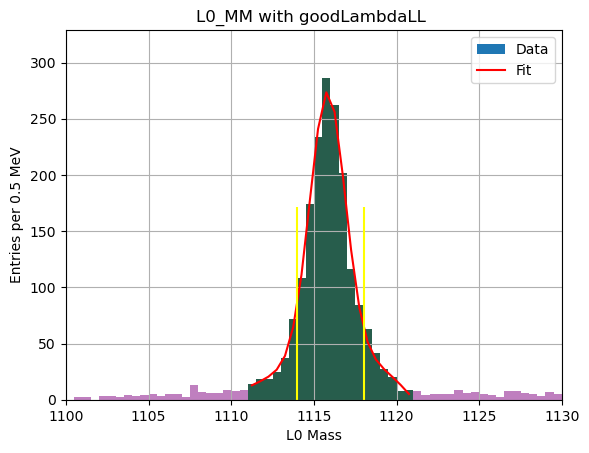

In [19]:
variables["fig" + root_name], variables["ax" + root_name] = variables["fit_model" + root_name].plot(variables["fit_result" + root_name], variables["bins" + root_name], variables["nC" + root_name], title='L0_MM with goodLambdaLL ', xlabel='L0 Mass', ylabel='Entries per 0.5 MeV', vlines=[1114., 1118.], show_plot=False)

variables["ax" + root_name].hist(L0_MM[temp_cutLL], bins=60, range=(1100, 1130), color='purple', alpha=0.5)
variables["ax" + root_name].hist(L0_MM[good_LambdaLL], bins=60, range=(1100, 1130), color='g', alpha=0.5)

plt.show()


## Lambda DD (L0_DD)

### Fit using Double Gaussian plus Exponential

lets again, start with some random search to acquire good initial guess

The fit is for L0 with the following cuts 

`good_LambdaDD`   = `(Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & good_Delta_Z & good_Lambda_chisq_100 & DD`


In [20]:
root_name = "_DD"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "param_ranges": None,
    "random_search": None,
    "best_score": None,
    "best_params": None,
    "best_fit": None,
    "best_fit_m": None,
    "parsed_output": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM[good_LambdaDD], bins=60, range=(1100,1130))
plt.close()

variables["param_ranges" + root_name] = {
    "n_s": (1000, 10000),
    "f": (0.001, 0.999),
    "n_b": (10, 100),
    "mu1": (1110, 1116),
    "mu2": (1110, 1116),
    "sigma1": (10, 20),
    "sigma2": (10, 20),
    "A": (-0.1, 0.1),
    "b": (-1, 1),
}

variables["random_search" + root_name] = RandomSearch(variables["bins" + root_name], variables["nC" + root_name], fit_class=DoubleGaussian_plus_Exp, search_ranges=variables["param_ranges" + root_name], num_searches=100)

# Perform the search
variables["best_score" + root_name], variables["best_params" + root_name], variables["best_fit" + root_name] = variables["random_search" + root_name].perform_search()

# Print the results
print("Best chi2:", variables["best_score" + root_name])
print("Best initial parameters:", variables["best_params" + root_name])

# Fit the best_fit with the best_params
best_params_list = [variables["best_params" + root_name][param] for param in ["n_s", "f", "n_b", "mu1", "mu2", "sigma1", "sigma2", "A", "b"]]
variables["best_fit_m" + root_name] = variables["best_fit" + root_name].fit(best_params_list)


# Print the fitted parameters in a nice format to copy-paste
variables["parsed_output" + root_name] = parse_best_fit_parameters(variables["best_fit_m" + root_name].values)
print(variables["parsed_output" + root_name])


Best chi2: 5932.806605617396
Best initial parameters: {'n_s': 8555.73488023905, 'f': 0.6999843326481076, 'n_b': 65.86265729768297, 'mu1': 1114.7769041168137, 'mu2': 1114.5844659108666, 'sigma1': 10.406133395198104, 'sigma2': 10.587091829259393, 'A': -0.08447623770316584, 'b': -0.7738398207976696}
11044.227444470036, 0.3774439707426948, 7265.904047256758, 1115.671091356836, 1116.1031805992475, 1.2480708112730017, 2.720918644702943, 3.0929194741619166, 1.6468473472687792>


Now we use this initial guess to do the fit 

In [21]:
root_name = "_DD"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "init_pars": None,
    "minuit_limits": None,
    "fit_model": None,
    "fit_result": None,
    "fig": None,
    "ax": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM[good_LambdaDD], bins=60, range=(1100,1130))
plt.close()

# DoubleGaussian_plus_Exp [n_s, f, n_b, mu1, mu2, sigma1, sigma2, A, b] 
variables["init_pars" + root_name] = [11201.434666676392, 0.36737793383136563, -6879.175184348096, 1115.693811644691, 1116.0251308066365, 1.2350511307117202, 2.775691738998944, 0.07065866104416511, 0.38367181831167313]
variables["minuit_limits" + root_name] = {
    "f": (0.0001, 0.9999),
}

variables["fit_model" + root_name] = DoubleGaussian_plus_Exp(variables["bins" + root_name], variables["nC" + root_name], variables["minuit_limits" + root_name])

variables["fit_result" + root_name] = variables["fit_model" + root_name].fit(variables["init_pars" + root_name])

# Print the fitted parameters
print("Fitted parameters:", variables["fit_result" + root_name].values)
variables["fit_result" + root_name]



Fitted parameters: <ValueView n_s=11278.259758900156 f=0.36292222748892783 n_b=-9282.712883988968 mu1=1115.7052814725632 mu2=1115.980671635783 sigma1=1.230084610566409 sigma2=2.803922072544311 A=0.07065866104416246 b=0.37049392871647>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 20.49                      │              Nfcn = 351              │
│ EDM = 0.000199 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s    │ 11.2783e3 │ 0.0020e3  │            │            │         │         │       │
│ 1 │ f      │   0.36    │   0.06    │            │            │ 0.0001  │ 0.9999  │       │
│ 2 │ n_b    │ -9.2827e3 │ 0.0020e3  │            │            │         │         │       │
│ 3 │ mu1    │ 1.11571e3 │ 0.00004e3 │            │            │         │         │       │
│ 4 │ mu2    │ 1.11598e3 │ 0.00009e3 │            │            │         │         │       │
│ 5 │ sigma1 │   1.23    │   0.09    │            │            │         │         │       │
│ 6 │ sigma2 │   2.80    │   0.15    │            │            │         │         │       │
│ 7 │ A      │    0.1    │    2.0    │            │            │         │         │       │
│ 8 │ b      │   0.37    │   0.05    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────────────────────┐
│        │     n_s       f     n_b     mu1     mu2  sigma1  sigma2       A       b │
├────────┼─────────────────────────────────────────────────────────────────────────┤
│    n_s │       4   0.000       0  0.0004  -0.001   0.000   0.002       0 -0.0014 │
│      f │   0.000 0.00371  -0.000  0.0004   0.004   0.005   0.008  -0.000  0.0018 │
│    n_b │       0  -0.000       4 -0.0000   0.000  -0.000  -0.000       0 -0.0000 │
│    mu1 │  0.0004  0.0004 -0.0000 0.00178 -0.0011  0.0006  0.0015 -0.0000 -0.0002 │
│    mu2 │  -0.001   0.004   0.000 -0.0011  0.0077   0.005   0.007  -0.000  0.0035 │
│ sigma1 │   0.000   0.005  -0.000  0.0006   0.005 0.00817   0.011  -0.000  0.0023 │
│ sigma2 │   0.002   0.008  -0.000  0.0015   0.007   0.011  0.0226  -0.000  0.0030 │
│      A │       0  -0.000       0 -0.0000  -0.000  -0.000  -0.000       4 -0.0000 │
│      b │ -0.0014  0.0018 -0.0000 -0.0002  0.0035  0.0023  0.0030 -0.0000 0.00272 │
└────────┴─────────────────────────────────────────────────────────────────────────┘

and we do the same plots as before:

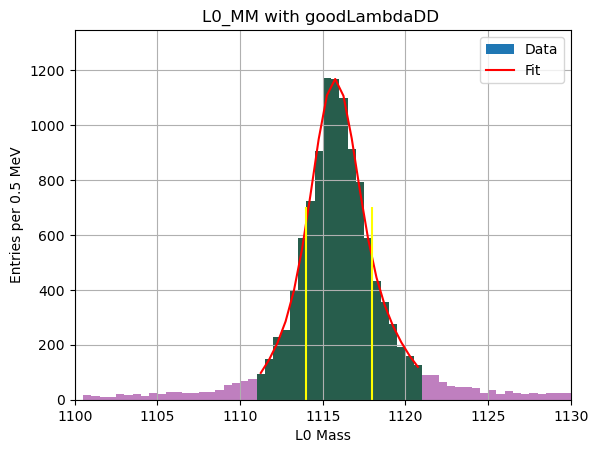

In [22]:
variables["fig" + root_name], variables["ax" + root_name] = variables["fit_model" + root_name].plot(variables["fit_result" + root_name], variables["bins" + root_name], variables["nC" + root_name], title='L0_MM with goodLambdaDD ', xlabel='L0 Mass', ylabel='Entries per 0.5 MeV', vlines=[1114., 1118.], show_plot=False)

variables["ax" + root_name].hist(L0_MM[temp_cutDD], bins=60, range=(1100, 1130), color='purple', alpha=0.5)
variables["ax" + root_name].hist(L0_MM[good_LambdaDD], bins=60, range=(1100, 1130), color='g', alpha=0.5)

plt.show()


# B Fitting

First lets try to get a good B+ sample. we will try the following cuts

- p_ProbNNp
- good_Lambda
- prodProbKK > 0.2
- B is in its correct mass range (5240,5320). 

In [23]:

good_b = good_Lambda & (prodProbKK > 0.4) & (p_ProbNNp > 0.5)   & (Bu_MM > 5240) & (Bu_MM < 5320)
# add mass cut that Bu_MM is between 5200 and 5400
good_b_mass = Bu_MM[good_b]

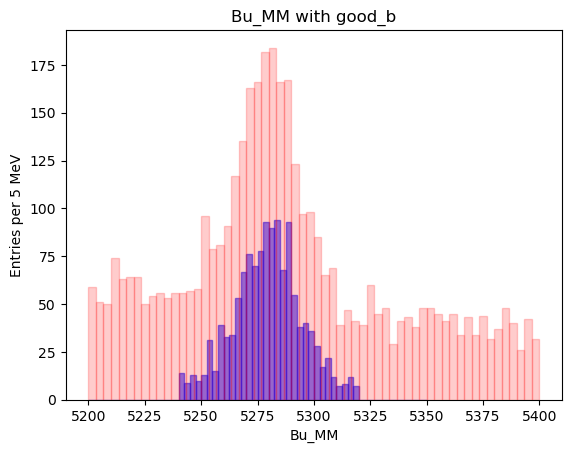

In [24]:
# Now lets plot the Bu_Mass for good_b

plt.figure()
plt.hist(good_b_mass, bins=60, range=(5200, 5350), facecolor='b', edgecolor='b', alpha=0.5)
plt.hist(Bu_MM, bins=60, range=(5200, 5400), facecolor='r', edgecolor='r', alpha=0.2)
plt.xlabel('Bu_MM')
plt.ylabel('Entries per 5 MeV')
plt.title('Bu_MM with good_b')
plt.show()


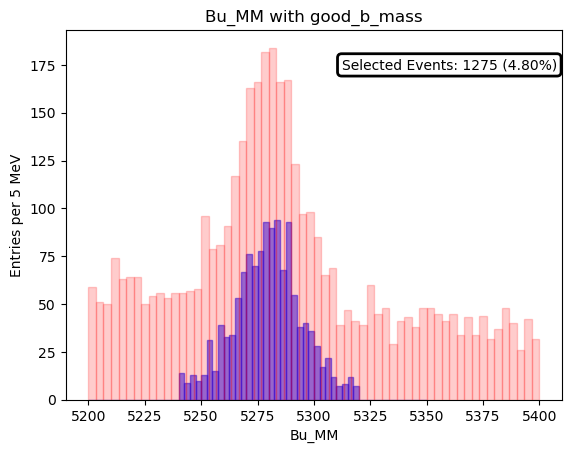

In [25]:
# Count the number of total events and the events in good_b_mass
total_events = len(Bu_MM)
good_b_events = len(good_b_mass)

# Calculate the percentage of events in good_b_mass
perc_good_b = (good_b_events / total_events) * 100

# Plot the histograms
plt.figure()

plt.hist(good_b_mass, bins=60, range=(5200, 5350), facecolor='b', edgecolor='b', alpha=0.5)
plt.hist(Bu_MM, bins=60, range=(5200, 5400), facecolor='r', edgecolor='r', alpha=0.2)

# Annotate the plot with the number and percentage of events in good_b_mass
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=2)
plt.annotate(f'Selected Events: {good_b_events} ({perc_good_b:.2f}%)', 
             xy=(0.5, 1), xycoords='axes fraction', xytext=(20,-20), textcoords='offset points',
             ha='left', va='top', bbox=bbox_props)

plt.xlabel('Bu_MM')
plt.ylabel('Entries per 5 MeV')
plt.title('Bu_MM with good_b_mass')

plt.show()

Now lets try to fit this plot. lets first try doublegaussian plus expoentnial

In [26]:
root_name = "_B"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "init_pars": None,
    "minuit_limits": None,
    "fit_model": None,
    "fit_result": None,
    "fig": None,
    "ax": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(good_b_mass, bins=40, range=(5240,5320))
plt.close()

# DoubleGaussian_plus_Exp [n_s, f, n_b, mu1, mu2, sigma1, sigma2, A, b] 
variables["init_pars" + root_name] = [4873.4760697665915, 0.4733713300413461, 73.97522612420896, 5308.4191006494775, 5288.359631406509, 48.86230883538156, 42.866187918899364, 0.07602927400885012, -0.5675657838690447]
variables["minuit_limits" + root_name] = {
    "f": (0.0001, 0.9999),
}

variables["fit_model" + root_name] = DoubleGaussian_plus_Exp(variables["bins" + root_name], variables["nC" + root_name], variables["minuit_limits" + root_name])

variables["fit_result" + root_name] = variables["fit_model" + root_name].fit(variables["init_pars" + root_name])

# Print the fitted parameters
print("Fitted parameters:", variables["fit_result" + root_name].values)
variables["fit_result" + root_name]



Fitted parameters: <ValueView n_s=3002.0790726121595 f=0.6809876654265318 n_b=280.6360221241696 mu1=5574.257005403474 mu2=5280.075548784027 sigma1=42.81529465611595 sigma2=11.997283754208324 A=0.07602927400879506 b=0.0042724762170697796>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 37.49                      │              Nfcn = 771              │
│ EDM = 8.55e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s    │ 3.0021e3  │ 0.0020e3  │            │            │         │         │       │
│ 1 │ f      │   0.681   │   0.012   │            │            │ 0.0001  │ 0.9999  │       │
│ 2 │ n_b    │   280.6   │    2.0    │            │            │         │         │       │
│ 3 │ mu1    │ 5.5743e3  │ 0.0020e3  │            │            │         │         │       │
│ 4 │ mu2    │ 5.2801e3  │ 0.0005e3  │            │            │         │         │       │
│ 5 │ sigma1 │   42.8    │    2.0    │            │            │         │         │       │
│ 6 │ sigma2 │   12.0    │    0.4    │            │            │         │         │       │
│ 7 │ A      │    0.1    │    2.0    │            │            │         │         │       │
│ 8 │ b      │   0.004   │   0.004   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│        │       n_s         f       n_b       mu1       mu2    sigma1    sigma2         A         b │
├────────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│    n_s │         4   0.42e-3        -0        -0     -0.00         0      0.00        -0         0 │
│      f │   0.42e-3  0.000134   1.14e-3        -0   0.01e-3         0  -0.93e-3         0 -0.001e-3 │
│    n_b │        -0   1.14e-3      3.99         0      0.00        -0     -0.04         0 -0.053e-3 │
│    mu1 │        -0        -0         0         4     -0.00        -0      0.00         0        -0 │
│    mu2 │     -0.00   0.01e-3      0.00     -0.00     0.276      0.00     -0.01      0.00  0.865e-3 │
│ sigma1 │         0         0        -0        -0      0.00         4     -0.00         0         0 │
│ sigma2 │      0.00  -0.93e-3     -0.04      0.00     -0.01     -0.00     0.164     -0.00  0.010e-3 │
│      A │        -0         0         0         0      0.00         0     -0.00         4         0 │
│      b │         0 -0.001e-3 -0.053e-3        -0  0.865e-3         0  0.010e-3         0  1.26e-05 │
└────────┴───────────────────────────────────────────────────────────────────────────────────────────┘

Now lets plot the fit.

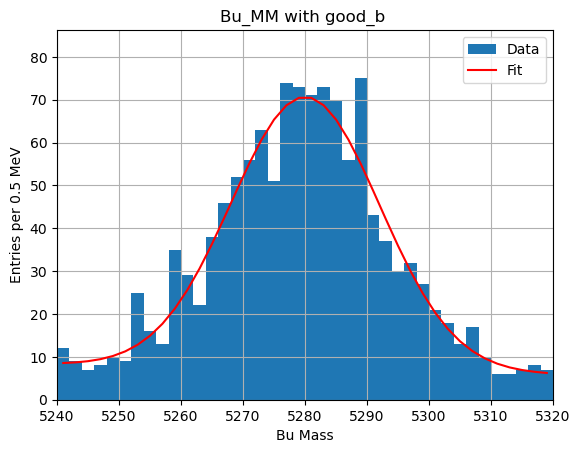

In [27]:
root_name = "_B"

variables["fig" + root_name], variables["ax" + root_name] = variables["fit_model" + root_name].plot(variables["fit_result" + root_name], variables["bins" + root_name], variables["nC" + root_name], title='Bu_MM with good_b ', xlabel='Bu Mass', ylabel='Entries per 0.5 MeV', show_plot=False)
plt.show()


It seems that I need some random search 

In [28]:
root_name = "_B"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "param_ranges": None,
    "random_search": None,
    "best_score": None,
    "best_params": None,
    "best_fit": None,
    "best_fit_m": None,
    "parsed_output": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(good_b_mass, bins=40, range=(5270,5290))
plt.close()

variables["param_ranges" + root_name] = {
    "n_s": (1000, 10000),
    "f": (0.001, 0.999),
    "n_b": (10, 100),
    "mu1": (5240,5320),
    "mu2": (5240,5320),
    "sigma1": (40, 50),
    "sigma2": (50, 40),
    "A": (-0.1, 0.1),
    "b": (-1, 1),
}

variables["random_search" + root_name] = RandomSearch(variables["bins" + root_name], variables["nC" + root_name], fit_class=DoubleGaussian_plus_Exp, search_ranges=variables["param_ranges" + root_name], num_searches=100)

# Perform the search
variables["best_score" + root_name], variables["best_params" + root_name], variables["best_fit" + root_name] = variables["random_search" + root_name].perform_search()

# Print the results
print("Best chi2:", variables["best_score" + root_name])
print("Best initial parameters:", variables["best_params" + root_name])

# Fit the best_fit with the best_params
best_params_list = [variables["best_params" + root_name][param] for param in ["n_s", "f", "n_b", "mu1", "mu2", "sigma1", "sigma2", "A", "b"]]
variables["best_fit_m" + root_name] = variables["best_fit" + root_name].fit(best_params_list)


# Print the fitted parameters in a nice format to copy-paste
variables["parsed_output" + root_name] = parse_best_fit_parameters(variables["best_fit_m" + root_name].values)
print(variables["parsed_output" + root_name])


Best chi2: 42.23371913010015
Best initial parameters: {'n_s': 4116.246238715716, 'f': 0.4873948465091005, 'n_b': 60.12011084507679, 'mu1': 5307.519849345183, 'mu2': 5249.938946899559, 'sigma1': 49.730395522476186, 'sigma2': 44.485768818874426, 'A': -0.08181348381244447, 'b': -0.10796552940280657}
3537.63043836825, 1.941558928126477, -342.6167372034106, 5272.303697951543, 5272.7959426995, 24.67470353161236, 22.263355998248645, -0.0818134082979308, 0.044443185901908586>


## Invariant Masses

First, lets define the four momentums for our decay produces

In [29]:
K1_4vec  = vector.awk({"x":h1_PX, "y":h1_PY, "z":h1_PZ, "t":h1_PE}) # K+
K2_4vec  = vector.awk({"x":h2_PX, "y":h2_PY, "z":h2_PZ, "t":h2_PE}) # K-
p_4vec   = vector.awk({"x":p_PX,  "y":p_PY,  "z":p_PZ,  "t":p_PE}) # p
L0_4vec  = vector.awk({"x":L0_PX,  "y":L0_PY,  "z":L0_PZ,  "t":L0_PE}) # L0

# define a four momentum for K+ K- system
KK_4vec  = K1_4vec+K2_4vec
KK_mass  = np.sqrt(np.square(KK_4vec.t)  - np.square(KK_4vec.x)  - np.square(KK_4vec.y)  - np.square(KK_4vec.z))

# define a four momentum for p K- system
pKm_4vec  = p_4vec+K2_4vec
pKm_mass  = np.sqrt(np.square(pKm_4vec.t)  - np.square(pKm_4vec.x)  - np.square(pKm_4vec.y)  - np.square(pKm_4vec.z))

# define a four momentum for p L0_bar K- system
pL0Km_4vec  = p_4vec+L0_4vec+K2_4vec
pL0Km_mass  = np.sqrt(np.square(pL0Km_4vec.t)  - np.square(pL0Km_4vec.x)  - np.square(pL0Km_4vec.y)  - np.square(pL0Km_4vec.z))


In [30]:
# We also need to define the same quantities for the MC sample
K1_4vec_mc = vector.awk({"x":h1_PX_mc, "y":h1_PY_mc, "z":h1_PZ_mc, "t":h1_PE_mc}) # K+
K2_4vec_mc = vector.awk({"x":h2_PX_mc, "y":h2_PY_mc, "z":h2_PZ_mc, "t":h2_PE_mc}) # K-
p_4vec_mc  = vector.awk({"x":p_PX_mc,  "y":p_PY_mc,  "z":p_PZ_mc,  "t":p_PE_mc}) # p
L0_4vec_mc = vector.awk({"x":L0_PX_mc,  "y":L0_PY_mc,  "z":L0_PZ_mc,  "t":L0_PE_mc}) # L0

# define the 4-vectors for the K+ K- system (MC)
KK_4vec_mc = K1_4vec_mc + K2_4vec_mc
KK_mass_mc = KK_4vec_mc.tau

# define the 4-vectors for the p K- system (MC)
pKm_4vec_mc = p_4vec_mc + K2_4vec_mc
pKm_mass_mc = pKm_4vec_mc.tau

# define the 4-vectors for the p L0_bar K- system (MC)
pL0Km_4vec_mc = p_4vec_mc + L0_4vec_mc + K2_4vec_mc
pL0Km_mass_mc = pL0Km_4vec_mc.tau

#### K+K-

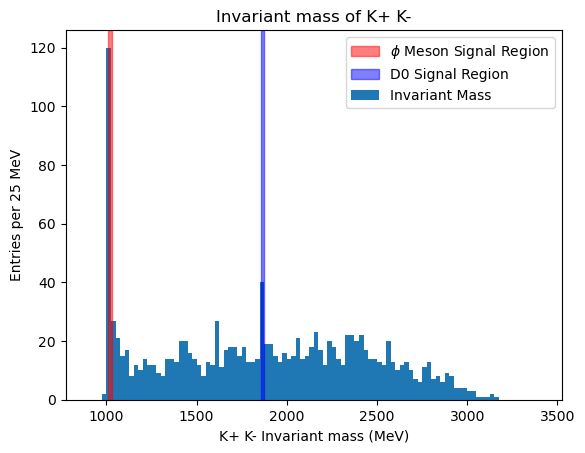

In [31]:
# plt the K+ K- invaarint mass histogram


# Define the mass regions of interest
phi_mass = 1019  # phi meson mass peak in MeV
D0_mass = 1865  # D0 mass peak in MeV

# Define the range around the mass peaks (±5 MeV)
mass_range = 10

plt.figure()
plt.hist(KK_mass[good_b], bins=100, range=(900, 3400))
plt.title("Invariant mass of K+ K-")
plt.xlabel("K+ K- Invariant mass (MeV)")
plt.ylabel("Entries per 25 MeV")

# Add vertical spans for each particle
plt.axvspan(phi_mass - mass_range, phi_mass + mass_range, alpha=0.5, color='red')
plt.axvspan(D0_mass - mass_range, D0_mass + mass_range, alpha=0.5, color='blue')

# Add legends
plt.legend(["$\phi$ Meson Signal Region", "D0 Signal Region", "Invariant Mass"])

plt.show()

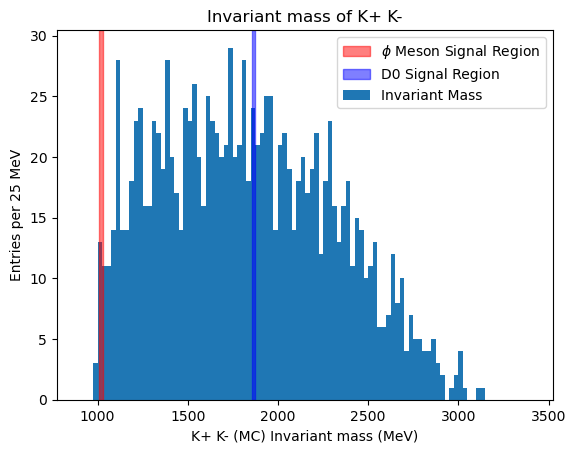

In [32]:
# plt the K+ K- invaarint mass histogram


# Define the mass regions of interest
phi_mass = 1019  # phi meson mass peak in MeV
D0_mass = 1865  # D0 mass peak in MeV

# Define the range around the mass peaks (±5 MeV)
mass_range = 10

plt.figure()
plt.hist(KK_mass_mc[good_b], bins=100, range=(900, 3400))
plt.title("Invariant mass of K+ K-")
plt.xlabel("K+ K- (MC) Invariant mass (MeV)")
plt.ylabel("Entries per 25 MeV")

# Add vertical spans for each particle
plt.axvspan(phi_mass - mass_range, phi_mass + mass_range, alpha=0.5, color='red')
plt.axvspan(D0_mass - mass_range, D0_mass + mass_range, alpha=0.5, color='blue')

# Add legends
plt.legend(["$\phi$ Meson Signal Region", "D0 Signal Region", "Invariant Mass"])

plt.show()

In [33]:
# define a four momentum for Lambda_0 K+ system
Lambda0Kp_4vec = L0_4vec + K1_4vec
Lambda0Kp_mass_squared = np.square(Lambda0Kp_4vec.t) - np.square(Lambda0Kp_4vec.x) - np.square(Lambda0Kp_4vec.y) - np.square(Lambda0Kp_4vec.z)

# define a four momentum for Lambda_0 K- system
Lambda0Km_4vec = L0_4vec + K2_4vec
Lambda0Km_mass_squared = np.square(Lambda0Km_4vec.t) - np.square(Lambda0Km_4vec.x) - np.square(Lambda0Km_4vec.y) - np.square(Lambda0Km_4vec.z)

# define a four momentum for p K- system
pKm_4vec = p_4vec + K2_4vec
pKm_mass_squared = np.square(pKm_4vec.t) - np.square(pKm_4vec.x) - np.square(pKm_4vec.y) - np.square(pKm_4vec.z)


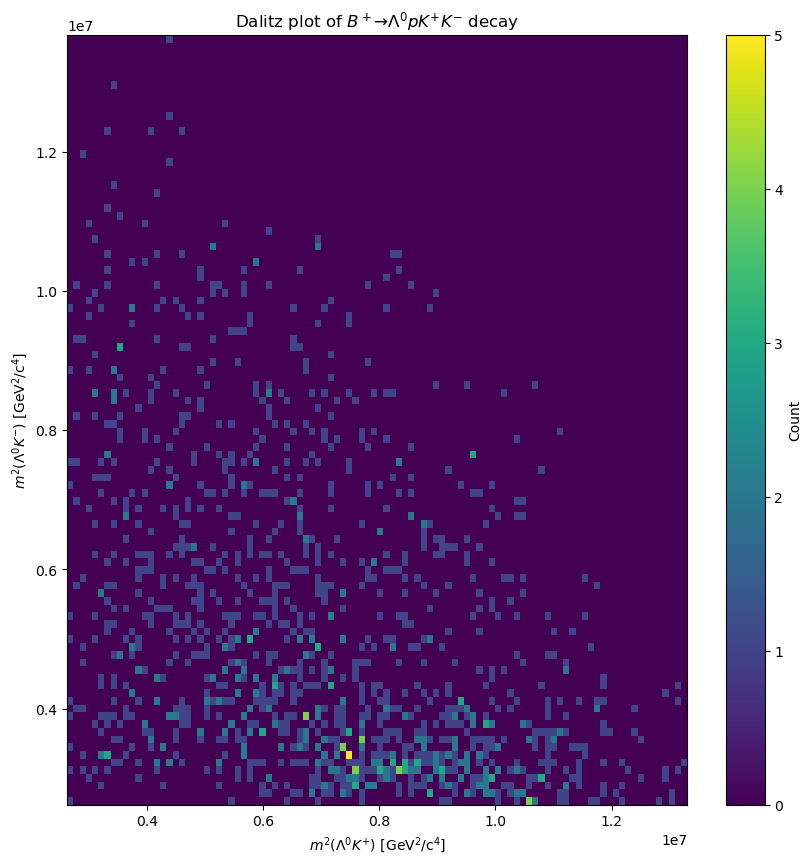

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak

# Assuming these variables are defined somewhere in your previous code:
# good_b, Lambda0Kp_mass_squared, Lambda0Km_mass_squared

# Select good_b events
Lambda0Kp_mass_squared_good = Lambda0Kp_mass_squared[good_b]
Lambda0Km_mass_squared_good = Lambda0Km_mass_squared[good_b]

# Convert the awkward arrays to numpy arrays
Lambda0Kp_mass_squared_np = ak.to_numpy(Lambda0Kp_mass_squared_good)
Lambda0Km_mass_squared_np = ak.to_numpy(Lambda0Km_mass_squared_good)

# Create 2D histogram using plt.hist2d()
plt.figure(figsize=(10,10))
plt.hist2d(Lambda0Kp_mass_squared_np, Lambda0Km_mass_squared_np, bins=100)

plt.colorbar(label='Count')
plt.xlabel('$m^2(\Lambda^{0} K^{+})$ [GeV$^2$/c$^4$]')
plt.ylabel('$m^2(\Lambda^{0} K^{-})$ [GeV$^2$/c$^4$]')
plt.title('Dalitz plot of $B^+ \\to \Lambda^{0} p  K^{+}  K^{-}$ decay')

plt.show()


#### p $K^{-}$

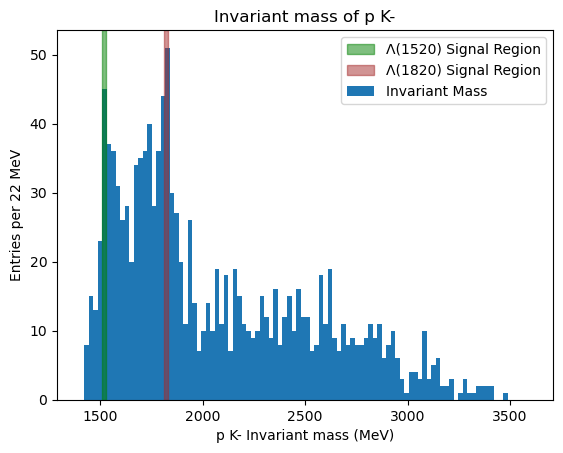

In [35]:
# plt the p K- invaarint mass histogram


# Define the mass region of interest
Lambda1520_mass = 1517  # Lambda (1520) mass peak in MeV
Lambda1820_mass = 1820  # Lambda (1820) mass peak in MeV
# Define the range around the mass peak (±5 MeV)
mass_range = 10

plt.figure()
plt.hist(pKm_mass[good_b], bins=100, range=(1400, 3600))
plt.title("Invariant mass of p K-")
plt.xlabel("p K- Invariant mass (MeV)")
plt.ylabel("Entries per 22 MeV")

# Add vertical span for Lambda (1520) and Lambda (1820) mass peaks
plt.axvspan(Lambda1520_mass - mass_range, Lambda1520_mass + mass_range, alpha=0.5, color='green')
plt.axvspan(Lambda1820_mass - mass_range, Lambda1820_mass + mass_range, alpha=0.5, color='brown')
# Add legends
plt.legend(["Λ(1520) Signal Region", "Λ(1820) Signal Region","Invariant Mass"])


plt.show()



Lets try to identify the peaks positions using scipy.signal.find_peaks

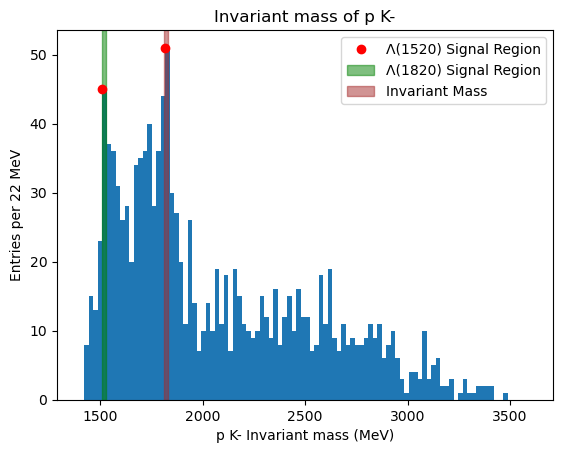

Peak masses: [1.51e+03, 1.82e+03]


In [36]:


# Generate histogram data
bins_edges = np.linspace(1400, 3600, 101) # bins edges, matching with what we used in plt.hist
hist, bins = np.histogram(pKm_mass[good_b], bins=bins_edges)

# Find peaks
#peaks, _ = find_peaks(hist, height=10, width=2)


# Find peaks with a prominence
peaks, _ = find_peaks(hist, prominence=20) 

# Calculate the mass values of the peaks
peak_masses = bins[peaks]


# Plot
plt.figure()
plt.hist(bins[:-1], bins, weights=hist)
plt.plot(bins[peaks], hist[peaks], "ro")
plt.title("Invariant mass of p K-")
plt.xlabel("p K- Invariant mass (MeV)")
plt.ylabel("Entries per 22 MeV")

# Add vertical span for Lambda (1520) and Lambda (1820) mass peaks
plt.axvspan(Lambda1520_mass - mass_range, Lambda1520_mass + mass_range, alpha=0.5, color='green')
plt.axvspan(Lambda1820_mass - mass_range, Lambda1820_mass + mass_range, alpha=0.5, color='brown')
# Add legends
plt.legend(["Λ(1520) Signal Region", "Λ(1820) Signal Region","Invariant Mass"])



plt.show()

# Print peak masses
print("Peak masses:", peak_masses)

I get something around 1820 MeV which is interesting (and probably wrong) as it indicates that we might have Σ(1820) resonance in the data. But according to the pdg, there is no decay mode of Σ(1820) to p K-. 
https://pdg.lbl.gov/2011/listings/rpp2011-list-lambda-1820.pdf

#### p  $\Lambda_{\bar{\phantom{x}}}$ K-

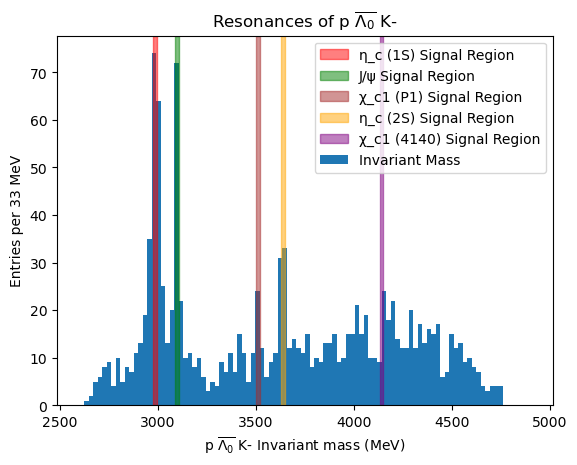

In [37]:
# plt the p L0_bar K- invaarint mass histogram


# Define the mass regions of interest
eta_c_mass = 2984  # eta_c(1S) mass peak in MeV
J_psi_mass = 3097  # J/psi mass peak in MeV
chi_c1_mass = 3511  # chi_c1 (P1) mass peak in MeV
eta_c_2S_mass = 3637  # eta_c(2S) mass peak in MeV
chi_c1_4140_mass = 4140  # chi_c1(4140) mass peak in MeV

# Define the range around the mass peaks (±5 MeV)
mass_range = 10

plt.figure()
plt.hist(pL0Km_mass[good_b], bins=100, range = (2600,4900))
plt.title(r"Resonances of p $\overline{\Lambda_{0}}$ K-")
plt.xlabel(r"p $\overline{\Lambda_{0}}$ K- Invariant mass (MeV)")
plt.ylabel("Entries per 33 MeV")

# Add vertical spans for each particle
plt.axvspan(eta_c_mass - mass_range, eta_c_mass + mass_range, alpha=0.5, color='red')
plt.axvspan(J_psi_mass - mass_range, J_psi_mass + mass_range, alpha=0.5, color='green')
plt.axvspan(chi_c1_mass - mass_range, chi_c1_mass + mass_range, alpha=0.5, color='brown')
plt.axvspan(eta_c_2S_mass - mass_range, eta_c_2S_mass + mass_range, alpha=0.5, color='orange')
plt.axvspan(chi_c1_4140_mass - mass_range, chi_c1_4140_mass + mass_range, alpha=0.5, color='purple')

# Add legends
plt.legend(["η_c (1S) Signal Region", "J/ψ Signal Region", "χ_c1 (P1) Signal Region", "η_c (2S) Signal Region", "χ_c1 (4140) Signal Region" , "Invariant Mass"])

plt.show()

AttributeError: 'BarContainer' object has no attribute 'Rectangle'

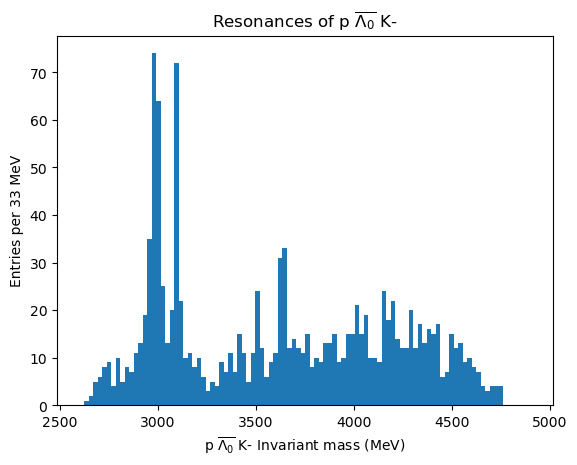

In [38]:

# plt the p L0_bar K- invaarint mass histogram

# Define the mass regions of interest
eta_c_mass = 2984  # eta_c(1S) mass peak in MeV
J_psi_mass = 3090  # J/psi mass peak in MeV
chi_c1_mass = 3511  # chi_c1 (P1) mass peak in MeV
eta_c_2S_mass = 3637  # eta_c(2S) mass peak in MeV
chi_c1_4140_mass = 4140  # chi_c1(4140) mass peak in MeV

# Define the range around the mass peaks (±5 MeV)
mass_range = 10

fig, ax = plt.subplots()

hist_values, bin_edges, _ = ax.hist(pL0Km_mass[good_b], bins=100, range=(2600,4900))

ax.set_title(r"Resonances of p $\overline{\Lambda_{0}}$ K-")
ax.set_xlabel(r"p $\overline{\Lambda_{0}}$ K- Invariant mass (MeV)")
ax.set_ylabel("Entries per 33 MeV")

# Define a list of particles
particles = [(eta_c_mass, 'red', 'η_c (1S) Signal Region'),
             (J_psi_mass, 'green', 'J/ψ Signal Region'),
             (chi_c1_mass, 'brown', 'χ_c1 (P1) Signal Region'),
             (eta_c_2S_mass, 'orange', 'η_c (2S) Signal Region'),
             (chi_c1_4140_mass, 'purple', 'χ_c1 (4140) Signal Region')]

for particle_mass, color, label in particles:
    # Get the bin indices which are in the range of interest for each particle
    bin_indices = np.where((bin_edges >= particle_mass - mass_range) & (bin_edges <= particle_mass + mass_range))

    # Get the maximum y-value within these bins
    max_height = np.max(hist_values[bin_indices])

    # Create the Rectangle patch
    rect = patches.Rectangle((particle_mass - mass_range, 0), 2 * mass_range, max_height, linewidth=1, edgecolor=color, facecolor=color, alpha=0.5, label=label)

    # Add the patch to the axes
    ax.add_patch(rect)

# Add legends
ax.legend()

plt.show()


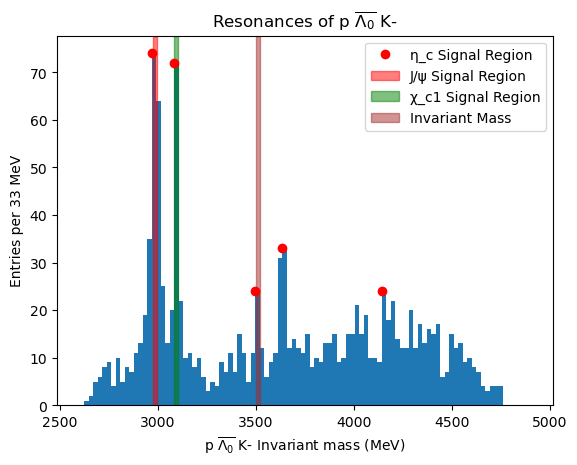

Peak masses: [2.97e+03, 3.08e+03, 3.5e+03, 3.64e+03, 4.14e+03]


In [ ]:
bins_edges = np.linspace(2600,4900, 101) # bins edges, matching with what we used in plt.hist
hist, bins = np.histogram(pL0Km_mass[good_b], bins=bins_edges)



# Find peaks
#peaks, _ = find_peaks(hist, height=10, width=2)


# Find peaks with a prominence
peaks, _ = find_peaks(hist, prominence=15) 

# Calculate the mass values of the peaks
peak_masses = bins[peaks]

# Plot
plt.figure()
plt.hist(bins[:-1], bins, weights=hist)
plt.plot(bins[peaks], hist[peaks], "ro")
plt.title(r"Resonances of p $\overline{\Lambda_{0}}$ K-")
plt.xlabel(r"p $\overline{\Lambda_{0}}$ K- Invariant mass (MeV)")
plt.ylabel("Entries per 33 MeV")

# Add vertical spans for each particle
plt.axvspan(eta_c_mass - mass_range, eta_c_mass + mass_range, alpha=0.5, color='red')
plt.axvspan(J_psi_mass - mass_range, J_psi_mass + mass_range, alpha=0.5, color='green')
plt.axvspan(chi_c1_mass - mass_range, chi_c1_mass + mass_range, alpha=0.5, color='brown')

# Add legends
plt.legend(["η_c Signal Region", "J/ψ Signal Region", "χ_c1 Signal Region", "Invariant Mass"])



plt.show()

# Print peak masses
print("Peak masses:", peak_masses)

### Remove resonances events 

Lets see if we remove resonances mass window events, what will happen to the B+ Histogram

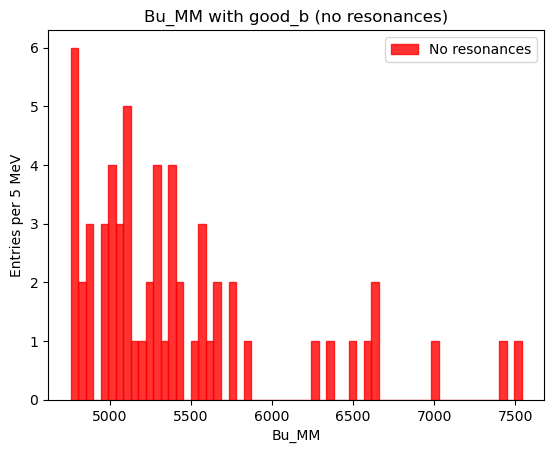

In [ ]:
mass_range = 10

mass_regions = [(phi_mass - mass_range, phi_mass + mass_range), 
                (D0_mass - mass_range, D0_mass + mass_range), 
                (Lambda1520_mass - mass_range, Lambda1520_mass + mass_range),
                (Lambda1820_mass - mass_range, Lambda1820_mass + mass_range),
                (eta_c_mass - mass_range, eta_c_mass + mass_range),
                (J_psi_mass - mass_range, J_psi_mass + mass_range),
                (chi_c1_mass - mass_range, chi_c1_mass + mass_range)]

# Create masks based on resonance regions for each decay mode
KK_mask = ~((KK_mass[good_b] > mass_regions[0][0]) & (KK_mass[good_b] < mass_regions[0][1]) & 
            (KK_mass[good_b] > mass_regions[1][0]) & (KK_mass[good_b] < mass_regions[1][1]))
pKm_mask = ~((pKm_mass[good_b] > mass_regions[2][0]) & (pKm_mass[good_b] < mass_regions[2][1]))
pL0Km_mask = ~((pL0Km_mass[good_b] > mass_regions[3][0]) & (pL0Km_mass[good_b] < mass_regions[3][1]) & 
               (pL0Km_mass[good_b] > mass_regions[4][0]) & (pL0Km_mass[good_b] < mass_regions[4][1]) & 
               (pL0Km_mass[good_b] > mass_regions[5][0]) & (pL0Km_mass[good_b] < mass_regions[5][1]))

# Combine all the masks
combined_mask = np.logical_and(np.logical_and(KK_mask, pKm_mask), pL0Km_mask)

# Update good_b to only contain events outside resonance regions
good_b_no_resonance = good_b[combined_mask]

# Now plot the B+ mass with resonance regions removed
Bu_MM_no_resonance = Bu_MM[good_b_no_resonance]

plt.figure()
#plt.hist(Bu_MM, bins=60, facecolor='b', edgecolor='b', alpha=0.2, label='With resonances')
plt.hist(Bu_MM_no_resonance, bins=60, facecolor='r', edgecolor='r', alpha=0.8, label='No resonances')
plt.xlabel('Bu_MM')
plt.ylabel('Entries per 5 MeV')
plt.title('Bu_MM with good_b (no resonances)')
plt.legend()
plt.show()


## Plots for talks

### MC

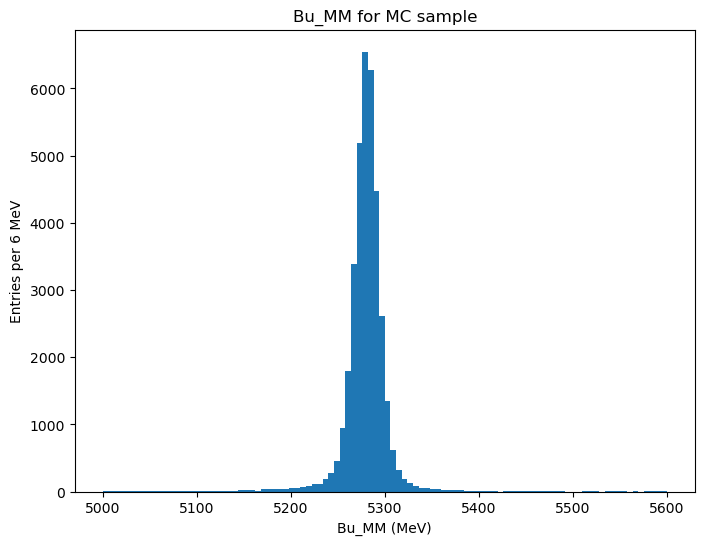

In [ ]:
# plot the Bu_MM distribution for the MC sample

plt.figure(figsize=(8,6))
plt.hist(Bu_MM_mc, bins=100, range=(5000, 5600))
plt.xlabel('Bu_MM (MeV)')
plt.ylabel('Entries per 6 MeV')
plt.title('Bu_MM for MC sample')
plt.show()

In [ ]:
# fit the Bu_MM_mc distribution with a double Gaussian plus a exponential background
root_name = "_Bu_MM_mc"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "init_pars": None,
    "minuit_limits": None,
    "fit_model": None,
    "fit_result": None,
    "fig": None,
    "ax": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(Bu_MM_mc, bins=100, range=(5240,5320))
plt.close()

# DoubleGaussian_plus_Exp [n_s, f, n_b, mu1, mu2, sigma1, sigma2, A, b] 
variables["init_pars" + root_name] = [4873.4760697665915, 0.4733713300413461, 73.97522612420896, 5308.4191006494775, 5288.359631406509, 48.86230883538156, 42.866187918899364, 0.07602927400885012, -0.5675657838690447]
variables["minuit_limits" + root_name] = {
    "f": (0.0001, 0.9999),
}

variables["fit_model" + root_name] = DoubleGaussian_plus_Exp(variables["bins" + root_name], variables["nC" + root_name], variables["minuit_limits" + root_name])

variables["fit_result" + root_name] = variables["fit_model" + root_name].fit(variables["init_pars" + root_name])

# Print the fitted parameters
print("Fitted parameters:", variables["fit_result" + root_name].values)
variables["fit_result" + root_name]



Fitted parameters: <ValueView n_s=31423.224810852615 f=0.004085355553326617 n_b=2934.199331305692 mu1=5156.899554546481 mu2=5280.759892314245 sigma1=17.053807507055737 sigma2=11.84701198868921 A=0.07602927400884839 b=0.0024889766012026015>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 132                        │              Nfcn = 794              │
│ EDM = 7.91e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s    │ 31.4232e3 │ 0.0020e3  │            │            │         │         │       │
│ 1 │ f      │   0.004   │   0.006   │            │            │ 0.0001  │ 0.9999  │       │
│ 2 │ n_b    │ 2.9342e3  │ 0.0020e3  │            │            │         │         │       │
│ 3 │ mu1    │ 5.1569e3  │ 0.0020e3  │            │            │         │         │       │
│ 4 │ mu2    │ 5.28076e3 │ 0.00008e3 │            │            │         │         │       │
│ 5 │ sigma1 │   17.1    │    2.0    │            │            │         │         │       │
│ 6 │ sigma2 │   11.85   │   0.06    │            │            │         │         │       │
│ 7 │ A      │    0.1    │    2.0    │            │            │         │         │       │
│ 8 │ b      │  0.0025   │  0.0012   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│        │       n_s         f       n_b       mu1       mu2    sigma1    sigma2         A         b │
├────────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│    n_s │         4  0.127e-3         0        -0    -0.000        -0    -0.000        -0        -0 │
│      f │  0.127e-3  3.44e-05  0.113e-3        -0 -0.002e-3 -0.001e-3 -0.037e-3        -0   -0.1e-6 │
│    n_b │         0  0.113e-3         4        -0    -0.000        -0    -0.001         0   -6.3e-6 │
│    mu1 │        -0        -0        -0         4    -0.000        -0     0.000        -0        -0 │
│    mu2 │    -0.000 -0.002e-3    -0.000    -0.000   0.00654    -0.000    -0.000    -0.000   38.8e-6 │
│ sigma1 │        -0 -0.001e-3        -0        -0    -0.000         4     0.000         0        -0 │
│ sigma2 │    -0.000 -0.037e-3    -0.001     0.000    -0.000     0.000   0.00376     0.000    0.1e-6 │
│      A │        -0        -0         0        -0    -0.000         0     0.000         4        -0 │
│      b │        -0   -0.1e-6   -6.3e-6        -0   38.8e-6        -0    0.1e-6        -0  1.37e-06 │
└────────┴───────────────────────────────────────────────────────────────────────────────────────────┘

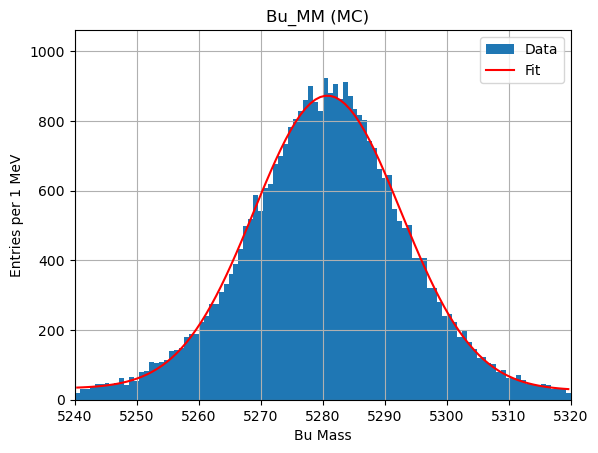

In [ ]:
root_name = "_Bu_MM_mc"

variables["fig" + root_name], variables["ax" + root_name] = variables["fit_model" + root_name].plot(variables["fit_result" + root_name], variables["bins" + root_name], variables["nC" + root_name], title='Bu_MM (MC)  ', xlabel='Bu Mass', ylabel='Entries per 1 MeV', show_plot=False)
plt.show()


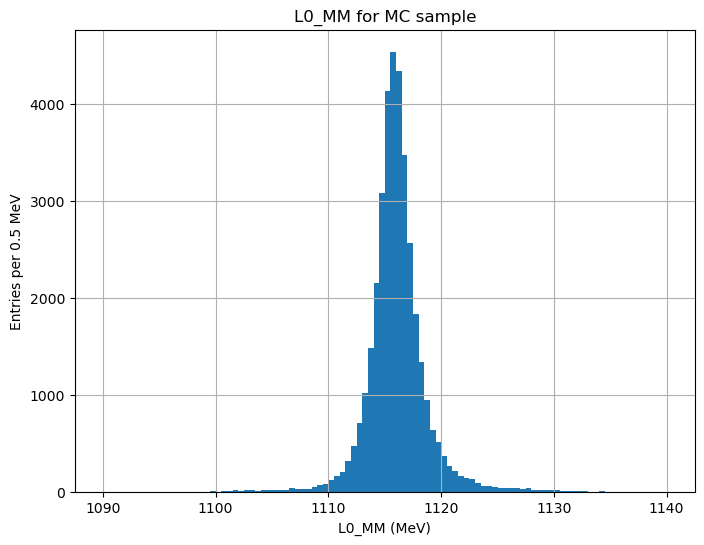

In [ ]:
# plot the L0_MM_mc distribution for MC


plt.figure(figsize=(8,6))
plt.hist(L0_MM_mc, bins=100, range=(1090, 1140))
plt.xlabel('L0_MM (MeV)')
plt.ylabel('Entries per 0.5 MeV')
plt.title('L0_MM for MC sample')
plt.grid(True)
plt.show()

In [ ]:
root_name = "_L0_MM_mc"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "param_ranges": None,
    "random_search": None,
    "best_score": None,
    "best_params": None,
    "best_fit": None,
    "best_fit_m": None,
    "parsed_output": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM_mc, bins=60, range=(1100,1130))
plt.close()

variables["param_ranges" + root_name] = {
    "n_s": (1000, 10000),
    "f": (0.001, 0.999),
    "n_b": (10, 100),
    "mu1": (1110, 1116),
    "mu2": (1110, 1116),
    "sigma1": (10, 20),
    "sigma2": (10, 20),
    "A": (-0.1, 0.1),
    "b": (-1, 1),
}

variables["random_search" + root_name] = RandomSearch(variables["bins" + root_name], variables["nC" + root_name], fit_class=DoubleGaussian_plus_Exp, search_ranges=variables["param_ranges" + root_name], num_searches=100)

# Perform the search
variables["best_score" + root_name], variables["best_params" + root_name], variables["best_fit" + root_name] = variables["random_search" + root_name].perform_search()

# Print the results
print("Best chi2:", variables["best_score" + root_name])
print("Best initial parameters:", variables["best_params" + root_name])

# Fit the best_fit with the best_params
best_params_list = [variables["best_params" + root_name][param] for param in ["n_s", "f", "n_b", "mu1", "mu2", "sigma1", "sigma2", "A", "b"]]
variables["best_fit_m" + root_name] = variables["best_fit" + root_name].fit(best_params_list)


# Print the fitted parameters in a nice format to copy-paste
variables["parsed_output" + root_name] = parse_best_fit_parameters(variables["best_fit_m" + root_name].values)
print(variables["parsed_output" + root_name])


Best chi2: 33588.795728278405
Best initial parameters: {'n_s': 2568.5403174611824, 'f': 0.06493226596204968, 'n_b': 26.540268460447866, 'mu1': 1113.6032310615365, 'mu2': 1115.002970033277, 'sigma1': 18.117590155854494, 'sigma2': 10.647725229984445, 'A': 0.06801581462626269, 'b': 0.9524041965511905}
34336.232271886656, -0.5776561423286662, 1258.708136933823, 1117.9812363324047, 1116.7393809062073, -1.3941721229850854, 1.9778205529403219, 0.06801581462626373, -0.023841677055816926>


In [ ]:
# fit the Bu_MM_mc distribution with a double Gaussian plus a exponential background
root_name = "_L0_MM_mc"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "init_pars": None,
    "minuit_limits": None,
    "fit_model": None,
    "fit_result": None,
    "fig": None,
    "ax": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM_mc, bins=100, range=(1100,1130))
plt.close()

# DoubleGaussian_plus_Exp [n_s, f, n_b, mu1, mu2, sigma1, sigma2, A, b] 
variables["init_pars" + root_name] = [12030.701146953064, 2.685269647680082, 9472.535176981335, 1115.9200582132949, 1096.2036481411167, -1.6692697067049702, 8.218226726070778, 0.04276427509842071, 0.09220634684991051]
variables["minuit_limits" + root_name] = {
    "f": (0.0001, 0.9999),
}

variables["fit_model" + root_name] = DoubleGaussian_plus_Exp(variables["bins" + root_name], variables["nC" + root_name], variables["minuit_limits" + root_name])

variables["fit_result" + root_name] = variables["fit_model" + root_name].fit(variables["init_pars" + root_name])

# Print the fitted parameters
print("Fitted parameters:", variables["fit_result" + root_name].values)
variables["fit_result" + root_name]



Fitted parameters: <ValueView n_s=33299.57307277904 f=0.9998999936843374 n_b=1300.7306910546233 mu1=1115.914389016421 mu2=1072.4700797016164 sigma1=-1.7500557665959062 sigma2=6.332832966172983 A=0.05281535366779271 b=-0.03409816567878062>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1711                       │              Nfcn = 317              │
│ EDM = 2.25e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s    │  33.30e3  │  0.19e3   │            │            │         │         │       │
│ 1 │ f      │ 999.90e-3 │  0.06e-3  │            │            │ 0.0001  │ 0.9999  │       │
│ 2 │ n_b    │  1.30e3   │  0.04e3   │            │            │         │         │       │
│ 3 │ mu1    │1.115914e3 │0.000010e3 │            │            │         │         │       │
│ 4 │ mu2    │  1.072e3  │  0.008e3  │            │            │         │         │       │
│ 5 │ sigma1 │   -1.75   │   0.01    │            │            │         │         │       │
│ 6 │ sigma2 │    6.3    │    3.5    │            │            │         │         │       │
│ 7 │ A      │    0.1    │    1.4    │            │            │         │         │       │
│ 8 │ b      │  -0.0341  │  0.0024   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│        │         n_s           f         n_b         mu1         mu2      sigma1      sigma2           A           b │
├────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    n_s │    3.48e+04  25.1834e-9      -0.6e3     3.99e-3         -10   -76.31e-3          -6        -0.0  -10.194e-3 │
│      f │  25.1834e-9    1.54e-12 -20.7799e-9    -1.4e-12    33.6e-12    -2.3e-12    15.6e-12           0     0.3e-12 │
│    n_b │      -0.6e3 -20.7799e-9    1.95e+03    -6.43e-3          10    65.75e-3           5         0.0    4.335e-3 │
│    mu1 │     3.99e-3    -1.4e-12    -6.43e-3    9.63e-05     0.53e-3    -0.01e-3     0.35e-3           0        1e-6 │
│    mu2 │         -10    33.6e-12          10     0.53e-3        63.8     1.05e-3           0         0.0      779e-6 │
│ sigma1 │   -76.31e-3    -2.3e-12    65.75e-3    -0.01e-3     1.05e-3     0.00011     0.69e-3           0        1e-6 │
│ sigma2 │          -6    15.6e-12           5     0.35e-3           0     0.69e-3        12.2         0.0      534e-6 │
│      A │        -0.0           0         0.0           0         0.0           0         0.0           2        0e-6 │
│      b │  -10.194e-3     0.3e-12    4.335e-3        1e-6      779e-6        1e-6      534e-6        0e-6    5.97e-06 │
└────────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

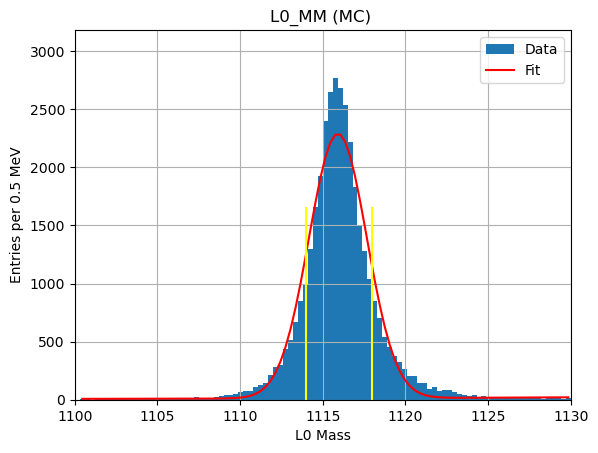

In [ ]:
root_name = "_L0_MM_mc"


variables["fig" + root_name], variables["ax" + root_name] = variables["fit_model" + root_name].plot(variables["fit_result" + root_name], variables["bins" + root_name], variables["nC" + root_name], title='L0_MM (MC) ', xlabel='L0 Mass', ylabel='Entries per 0.5 MeV', vlines=[1114., 1118.], show_plot=True)
plt.show()


### RD

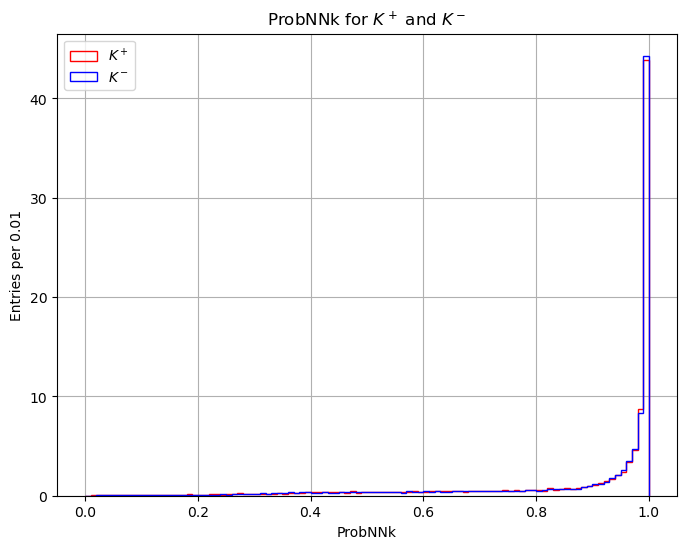

In [ ]:
# plot the probNNK distribution for Kp and Km
plt.figure(figsize=(8,6))
plt.hist(h1_probNNk, bins=100, range=(0,1), histtype='step', label=r'$K^+$', density=True, color='red')
plt.hist(h2_probNNk, bins=100, range=(0,1), histtype='step', label=r'$K^-$', density=True, color='blue')
plt.xlabel('ProbNNk')
plt.ylabel('Entries per 0.01')
plt.title(r'ProbNNk for $K^+$ and $K^-$')
plt.legend()
plt.grid(True)
plt.show()

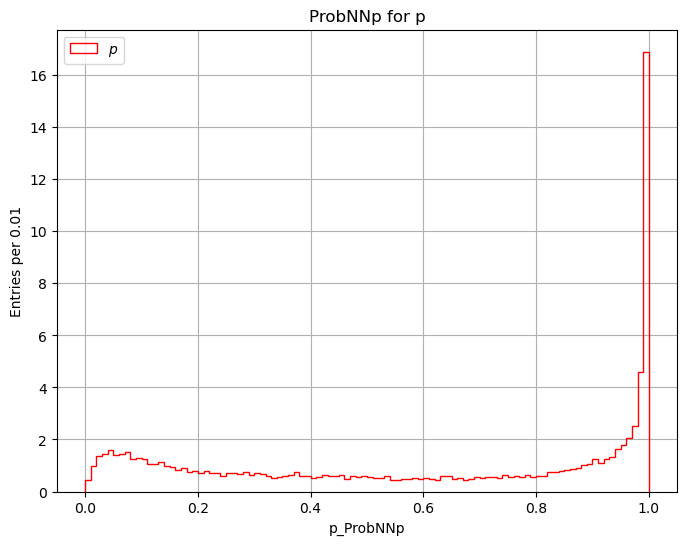

In [ ]:
# plot the p_ProbNNp for proton
plt.figure(figsize=(8,6))
plt.hist(p_ProbNNp, bins=100, range=(0,1), histtype='step', label=r'$p$', density=True, color='red')
plt.xlabel('p_ProbNNp')
plt.ylabel('Entries per 0.01')
plt.title('ProbNNp for p')
plt.legend()
plt.grid(True)
plt.show()

Number of events below cut:  3689
Number of events above cut:  22895
Total number of events:  26584
Percentage of events that pass:  86.12323201925972


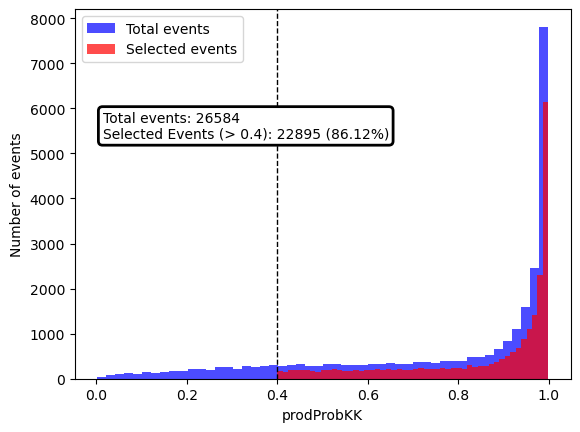

In [ ]:
num_bins = 50

# Apply the cut
cut = 0.4
masked = prodProbKK > cut

# Count the number of events below and above the cut
num_below_cut = np.sum(~masked)
num_above_cut = np.sum(masked)
total_events = num_below_cut + num_above_cut

# Percentage of events that pass
perc_pass = (num_above_cut / total_events) * 100

# Print the number of events
print("Number of events below cut: ", num_below_cut)
print("Number of events above cut: ", num_above_cut)
print("Total number of events: ", total_events)
print("Percentage of events that pass: ", perc_pass)

# Now plot the histogram with cut
plt.hist(prodProbKK, bins=num_bins, color='blue', alpha=0.7, label='Total events')
plt.hist(prodProbKK[masked], bins=num_bins, color='red', alpha=0.7, label='Selected events')

plt.axvline(x=cut, color='black', linestyle='dashed', linewidth=1)

# Create legend box
legend = plt.legend(loc='upper left')

# Annotating the plot with the total number of events, the number that pass, and the cut choice
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=2)
plt.annotate(f'Total events: {total_events}\nSelected Events (> {cut}): {num_above_cut} ({perc_pass:.2f}%)', 
             xy=(0, 0.8), xycoords='axes fraction', xytext=(20,-20), textcoords='offset points',
             ha='left', va='top', bbox=bbox_props)

plt.xlabel('prodProbKK')
plt.ylabel('Number of events')

plt.show()


Number of events below cut:  11035
Number of events above cut:  15549
Total number of events:  26584
Percentage of events that pass:  58.49006921456515


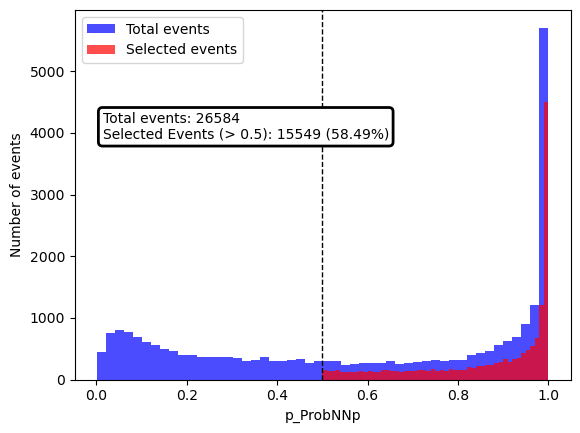

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Number of bins, you can modify this according to your requirement
num_bins = 50

# Apply the cut
cut = 0.5
masked = p_ProbNNp > cut

# Count the number of events below and above the cut
num_below_cut = np.sum(~masked)
num_above_cut = np.sum(masked)
total_events = num_below_cut + num_above_cut

# Percentage of events that pass
perc_pass = (num_above_cut / total_events) * 100

# Print the number of events
print("Number of events below cut: ", num_below_cut)
print("Number of events above cut: ", num_above_cut)
print("Total number of events: ", total_events)
print("Percentage of events that pass: ", perc_pass)

# Now plot the histogram with cut
plt.hist(p_ProbNNp, bins=num_bins, color='blue', alpha=0.7, label='Total events')
plt.hist(p_ProbNNp[masked], bins=num_bins, color='red', alpha=0.7, label='Selected events')

plt.axvline(x=cut, color='black', linestyle='dashed', linewidth=1)

# Create legend box
legend = plt.legend(loc='upper left')

# Annotating the plot with the total number of events, the number that pass, and the cut choice
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=2)
plt.annotate(f'Total events: {total_events}\nSelected Events (> {cut}): {num_above_cut} ({perc_pass:.2f}%)', 
             xy=(0, 0.8), xycoords='axes fraction', xytext=(20,-20), textcoords='offset points',
             ha='left', va='top', bbox=bbox_props)

plt.xlabel('p_ProbNNp')
plt.ylabel('Number of events')

plt.show()


Number of events below cut:  13040
Number of events above cut:  13544
Total number of events:  26584
Percentage of events that pass:  50.947938609690034


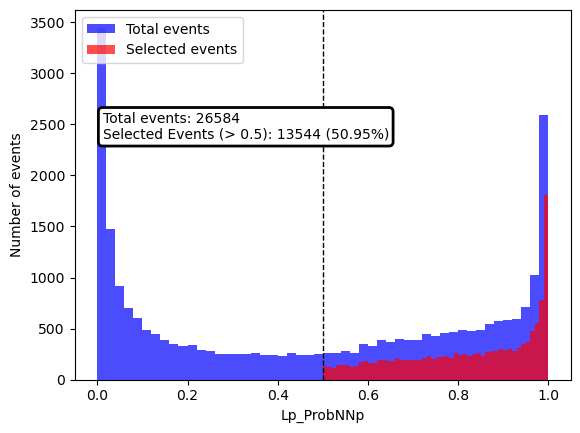

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Number of bins, you can modify this according to your requirement
num_bins = 50

# Apply the cut
cut = 0.5
masked = Lp_ProbNNp > cut

# Count the number of events below and above the cut
num_below_cut = np.sum(~masked)
num_above_cut = np.sum(masked)
total_events = num_below_cut + num_above_cut

# Percentage of events that pass
perc_pass = (num_above_cut / total_events) * 100

# Print the number of events
print("Number of events below cut: ", num_below_cut)
print("Number of events above cut: ", num_above_cut)
print("Total number of events: ", total_events)
print("Percentage of events that pass: ", perc_pass)

# Now plot the histogram with cut
plt.hist(Lp_ProbNNp, bins=num_bins, color='blue', alpha=0.7, label='Total events')
plt.hist(Lp_ProbNNp[masked], bins=num_bins, color='red', alpha=0.7, label='Selected events')

plt.axvline(x=cut, color='black', linestyle='dashed', linewidth=1)

# Create legend box
legend = plt.legend(loc='upper left')

# Annotating the plot with the total number of events, the number that pass, and the cut choice
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=2)
plt.annotate(f'Total events: {total_events}\nSelected Events (> {cut}): {num_above_cut} ({perc_pass:.2f}%)', 
             xy=(0, 0.8), xycoords='axes fraction', xytext=(20,-20), textcoords='offset points',
             ha='left', va='top', bbox=bbox_props)

plt.xlabel('Lp_ProbNNp')
plt.ylabel('Number of events')

plt.show()


Number of events below cut:  3594
Number of events above cut:  22990
Total number of events:  26584
Percentage of events that pass:  86.48058982846824


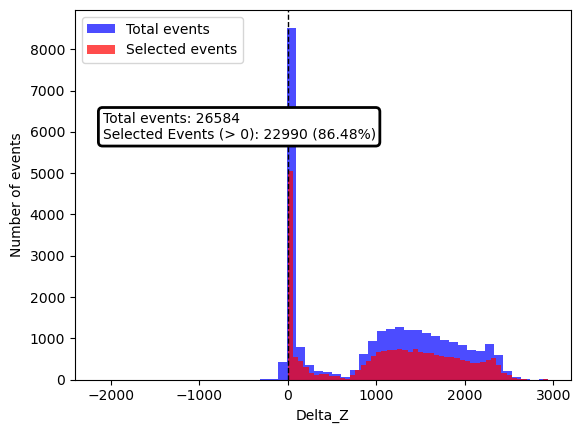

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Number of bins, you can modify this according to your requirement
num_bins = 50

# Apply the cut
cut = 0
masked = Delta_Z > cut

# Count the number of events below and above the cut
num_below_cut = np.sum(~masked)
num_above_cut = np.sum(masked)
total_events = num_below_cut + num_above_cut

# Percentage of events that pass
perc_pass = (num_above_cut / total_events) * 100

# Print the number of events
print("Number of events below cut: ", num_below_cut)
print("Number of events above cut: ", num_above_cut)
print("Total number of events: ", total_events)
print("Percentage of events that pass: ", perc_pass)

# Now plot the histogram with cut
plt.hist(Delta_Z, bins=num_bins, color='blue', alpha=0.7, label='Total events')
plt.hist(Delta_Z[masked], bins=num_bins, color='red', alpha=0.7, label='Selected events')

plt.axvline(x=cut, color='black', linestyle='dashed', linewidth=1)

# Create legend box
legend = plt.legend(loc='upper left')

# Annotating the plot with the total number of events, the number that pass, and the cut choice
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=2)
plt.annotate(f'Total events: {total_events}\nSelected Events (> {cut}): {num_above_cut} ({perc_pass:.2f}%)', 
             xy=(0, 0.8), xycoords='axes fraction', xytext=(20,-20), textcoords='offset points',
             ha='left', va='top', bbox=bbox_props)

plt.xlabel('Delta_Z')
plt.ylabel('Number of events')

plt.show()


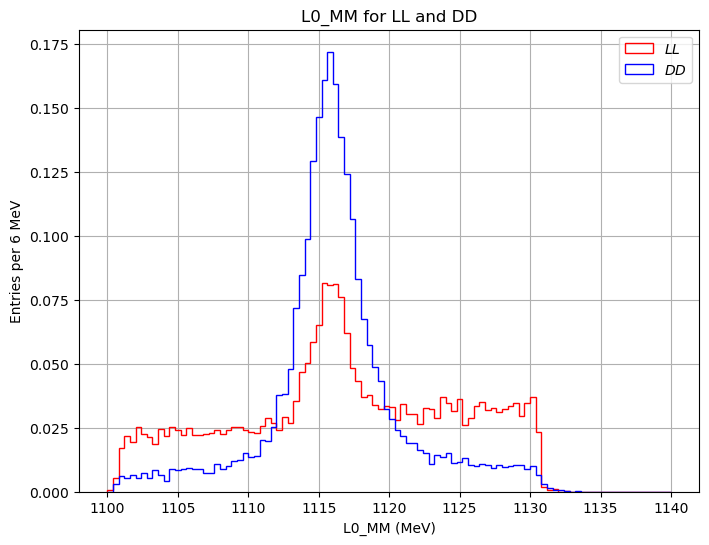

In [ ]:
# plot a histogram to see how many LL and DD events are in the data
plt.figure(figsize=(8,6))
plt.hist(L0_MM[LL], bins=100, range= (1100, 1140) ,histtype='step', label=r'$LL$', density=True, color='red')
plt.hist(L0_MM[DD], bins=100, range= (1100, 1140) , histtype='step', label=r'$DD$', density=True, color='blue')
plt.xlabel('L0_MM (MeV)')
plt.ylabel('Entries per 6 MeV')
plt.title('L0_MM for LL and DD')
plt.legend()
plt.grid(True)
plt.show()

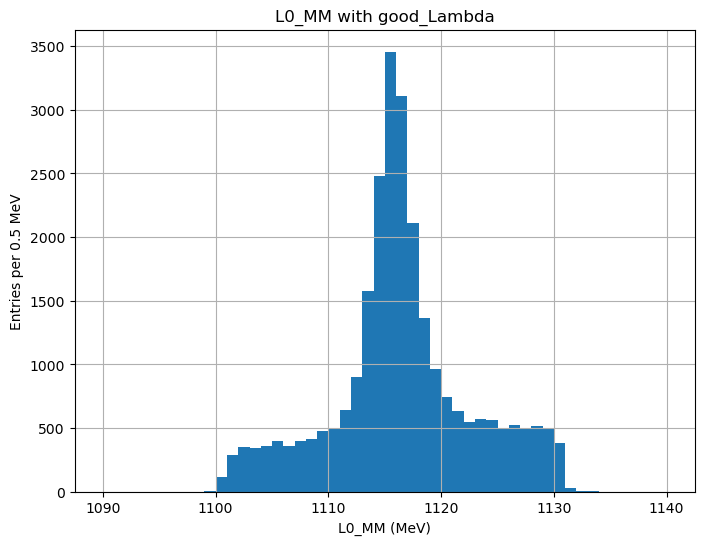

In [ ]:
# plt the histogram of L0_MM distribution with the good_Lambda selection

plt.figure(figsize=(8,6))
plt.hist(L0_MM, bins=50, range=(1090, 1140))
plt.xlabel('L0_MM (MeV)')
plt.ylabel('Entries per 0.5 MeV')
plt.title('L0_MM with good_Lambda')
plt.grid(True)
plt.show()

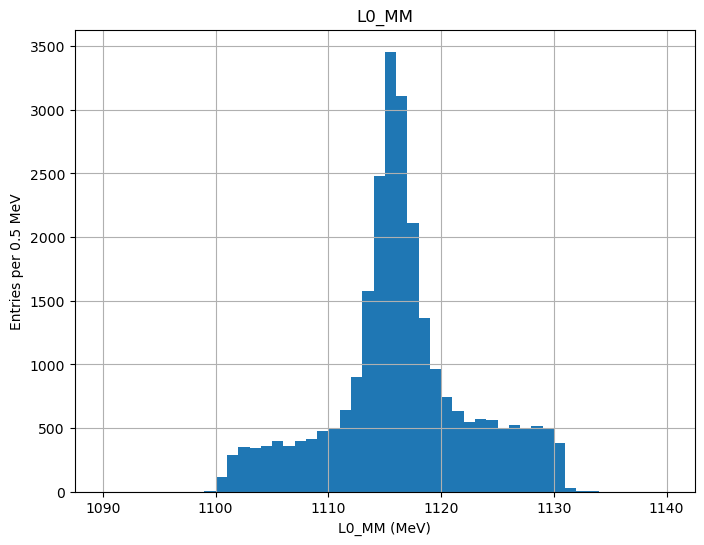

In [ ]:
# plt the histogram of L0_MM distribution without any cuts

plt.figure(figsize=(8,6))
plt.hist(L0_MM, bins=50, range=(1090, 1140))
plt.xlabel('L0_MM (MeV)')
plt.ylabel('Entries per 0.5 MeV')
plt.title('L0_MM')
plt.grid(True)
plt.show()

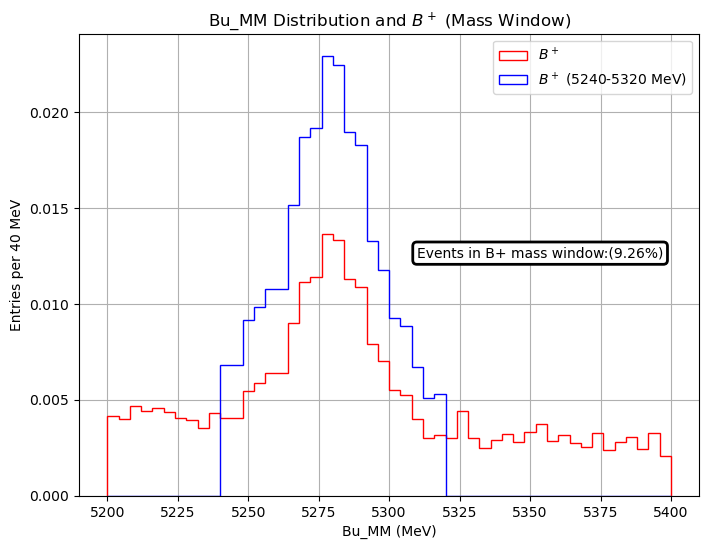

In [ ]:
# Define the bins and range
num_bins = 50
range_bins = (5200, 5400)

# Define the B+ mass window
mass_window = (5240, 5320)

# Apply the mass window
masked = (Bu_MM > mass_window[0]) & (Bu_MM < mass_window[1])

# Count the number of total events and the events in the B+ mass window
total_events = len(Bu_MM)
events_in_window = np.sum(masked)

# Calculate the percentage of events in the B+ mass window
perc_in_window = (events_in_window / total_events) * 100

# Plot the histograms
plt.figure(figsize=(8,6))

plt.hist(Bu_MM, bins=num_bins, range=range_bins, histtype='step', label=r'$B^+$', density=True, color='red')
plt.hist(Bu_MM[masked], bins=num_bins, range=range_bins, histtype='step', label=r'$B^+$ (5240-5320 MeV)', density=True, color='blue')

# Create legend box
plt.legend()

# Annotate the plot with the percentage of events in the B+ mass window
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=2)
plt.annotate(f'Events in B+ mass window:({perc_in_window:.2f}%)', 
             xy=(0.5, 0.6), xycoords='axes fraction', xytext=(20,-20), textcoords='offset points',
             ha='left', va='top', bbox=bbox_props)

plt.xlabel('Bu_MM (MeV)')
plt.ylabel('Entries per 40 MeV')
plt.title(r'Bu_MM Distribution and $B^+$ (Mass Window)') 
plt.grid(True)

plt.show()
